## 2. EDA meteorología

### Objetivo

Ánalisis exploratorio de las variables incluidas en el dataframe de meteorología.

### Descripción General de notebook

    1. Carga de data frame de movimientos
    2. Check valores nulos
    3. Ánalsis exploratorio de la variable Temperatura
    4. Ánalisis exploratorio de la variable Sensación Térmica
    5. Ánalisis exploratorio de la variable viento
    6. Ánalisis exploratorio de la variable presión
    7. Ánalisis exploratorio de la variable precitación 1h
    8. Ánalisis exploratorio de la variable precipitación 3h
    9. Ánalisis exploratorio de la variable tipo de tiempo
    10. Ánalisis exploratorio de la variable Desc_tiempo
    11. Ánalisis exploratorio de la variable DESC_TIEMPO_detalle

In [158]:
%run "../1. Librerias Mongo/MongoDB_Connections.ipynb"
%run "../1. Librerias Mongo/MongoDB_Funciones_Consultas.ipynb"

# from ipynb.fs.full.MongoDB_Connections import _connect_mongo

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _resumen_mensual_por_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_por_estacion
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes_por_estacion
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteoUS_full
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteoUS_por_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteoUS_por_anio_mes

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations_EstacionesMeteo


In [159]:
import time
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, plot_confusion_matrix

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [11]:
t_ini = time.time()
data_Tracks = pd.read_csv('../../data/DataTracks_MongoDB_2018-2020-Ene-Feb.csv')
t_end = time.time()
print (t_end - t_ini)

data_Tracks = data_Tracks.rename(columns={'idunplug_station': 'ESTACION'})

5.562950611114502


In [12]:
data_Tracks

,ANIO,MES,DIA,HORA,DIA_SEMANA,AM_PM,TEMPORADA,TEMPORADA_NUM,UNPLUG_TIME_date,travel_time,ESTACION,user_type,ageRange,zip_code,Es_Festivo,Es_FinSemana,DEMANDA
0,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,1023,102,1,3,28026,0,0,1
1,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,243,10,1,3,28007,0,0,1
2,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,780,110,1,0,NaN,0,0,1
3,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,452,111,1,3,28045,0,0,1
4,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,228,11,1,0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266476,2020,2,9,9,1,AM,INVIERNO,1,2020-02-09 09:00:00,192,9,1,0,NaN,0,1,1
8266477,2020,2,9,9,1,AM,INVIERNO,1,2020-02-09 09:00:00,695,92,1,4,"28,003.0",0,1,1
8266478,2020,2,9,9,1,AM,INVIERNO,1,2020-02-09 09:00:00,2738,9,1,0,NaN,0,1,1
8266479,2020,2,9,9,1,AM,INVIERNO,1,2020-02-09 09:00:00,1010,95,1,0,NaN,0,1,1


In [16]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8266481 entries, 0 to 8266480
Data columns (total 17 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   ANIO              int64 
 1   MES               int64 
 2   DIA               int64 
 3   HORA              int64 
 4   DIA_SEMANA        int64 
 5   AM_PM             object
 6   TEMPORADA         object
 7   TEMPORADA_NUM     int64 
 8   UNPLUG_TIME_date  object
 9   travel_time       int64 
 10  idunplug_station  int64 
 11  user_type         int64 
 12  ageRange          int64 
 13  zip_code          object
 14  Es_Festivo        int64 
 15  Es_FinSemana      int64 
 16  DEMANDA           int64 
dtypes: int64(13), object(4)
memory usage: 1.0+ GB


In [5]:
# Meteorologia
t_ini = time.time()
#data_Meteo = _consulta_meteoUS_por_anio(db_Meteo, 2020)
data_Meteo = _consulta_meteoUS_full(db_Meteo)
t_end = time.time()

print (t_end - t_ini)
data_Meteo


6.869521379470825


,ANIO,MES,DIA,HORA,TEMPERATURA,TEMP_SENS_TERMC,VIENTO,PRESION,HUMEDAD,PRECIPITACION_1h,PRECIPITACION_3h,NIEVE_1h,NIEVE_3h,ID_TIPO_TIEMPO,DESC_TIEMPO,DESC_TIEMPO_detalle
0,2018,1,1,3,6.58,2.48,7.2,1030,59,0,0,0,0,800,Clear,sky is clear
1,2018,1,1,4,5.14,1.69,4.63,1032,57,0,0,0,0,800,Clear,sky is clear
2,2018,1,1,9,4.48,1.81,3.1,1032,84,0,0,0,0,800,Clear,sky is clear
3,2018,1,1,10,6.15,2.28,6.2,1033,76,0,0,0,0,800,Clear,sky is clear
4,2018,1,1,14,10.98,9.52,7.2,1030,53,0,0,0,0,801,Clouds,few clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2020,12,30,0,2.71,-2.51,7.2,1013,68,0,0,0,0,800,Clear,sky is clear
26300,2020,12,30,3,2.55,-2.71,7.2,1014,66,0,0,0,0,800,Clear,sky is clear
26301,2020,12,30,20,3.88,0.42,4.1,1011,68,0,0,0,0,800,Clear,sky is clear
26302,2020,12,31,14,7.15,2.91,8.2,1013,64,0,0,0,0,802,Clouds,scattered clouds


In [6]:
# Stations
t_ini = time.time()
data_Stations = _consulta_stations(db_Stations)
t_end = time.time()

print (t_end - t_ini)
data_Stations


0.5748004913330078


,Id_Estacion,Nro_Estacion,Gis_X,Gis_Y,Fec_Alta,Distrito,Distrito_Nombre,Barrio,Barrio_Nombre,Calle,Finca,Tipo_Reserva,Plazas,Longitud,Latitud,Direccion
0,1,001 a,"440443,61","4474290,65",43803,1,CENTRO,01-06,SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.4171107,"ALCALA, CALLE, DE, 2"
1,2,001 b,"440480,56","4474301,74",43867,1,CENTRO,01-06,SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.7015636,40.4172132,"ALCALA, CALLE, DE, 6"
2,3,2,"440134,83","4474678,23",41813,1,CENTRO,01-05,UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.7056739,40.42058,"MIGUEL MOYA, CALLE, DE, 1"
3,4,3,"440012,98","4475760,68",41813,7,CHAMBERi,07-02,ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.7072122,40.4303224,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2"
4,5,4,"440396,4","4475565,36",41813,1,CENTRO,01-05,UNIVERSIDAD,"MANUELA MALASA�A, CALLE, DE",3,BiciMAD,24,-3.7026739,40.4285905,"MANUELA MALASA�A, CALLE, DE, 3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,265,257,"438063,25","4476718,06",44194,9,MONCLOA-ARAVACA,09-03,CIUDAD UNIVERSITARIA,"JUAN DE HERRERA, AVENIDA, DE",1,BiciMAD,24,-3.73029,40.438804,"JUAN DE HERRERA, AVENIDA, DE, 1"
260,266,258,"438326,14","4477849,84",44194,9,MONCLOA-ARAVACA,09-03,CIUDAD UNIVERSITARIA,"COMPLUTENSE, AVENIDA",frente al 14,BiciMAD,24,-3.7273004,40.449019,"COMPLUTENSE, AVENIDA, frente al 14"
261,267,259,"438344,78","4477338,89",44194,9,MONCLOA-ARAVACA,09-03,CIUDAD UNIVERSITARIA,"RAMON Y CAJAL, PLAZA, DE",S/N,BiciMAD,24,-3.727031,40.4444176,"RAMON Y CAJAL, PLAZA, DE, S/N"
262,268,260,"438328,53","4477762,41",44194,9,MONCLOA-ARAVACA,09-03,CIUDAD UNIVERSITARIA,"JOSE ANTONIO NOVAIS, CALLE, DE",S/N,BiciMAD,24,-3.7272637,40.4482316,"JOSE ANTONIO NOVAIS, CALLE, DE, S/N"


In [8]:
# Stations_Meteo
t_ini = time.time()
data_StationsMeteo = _consulta_stations_EstacionesMeteo(db_Stations_Meteo)
t_end = time.time()

print (t_end - t_ini)
data_StationsMeteo


1.6588528156280518


,Id_Station,Id_EstacionMeteo,Nro_Station,Nom_EstacionMeteo
0,1,28079035,001 a,Plaza del Carmen
1,2,28079035,001 b,Plaza del Carmen
2,3,28079035,2,Plaza del Carmen
3,4,28079004,3,Plaza Espa�a
4,5,28079109,4,J.M.D.Chamberi
...,...,...,...,...
259,265,28079106,257,Centro Mpal. De Acustica
260,266,28079106,258,Centro Mpal. De Acustica
261,267,28079106,259,Centro Mpal. De Acustica
262,268,28079106,260,Centro Mpal. De Acustica


In [9]:
###### Demografía ########
t_ini = time.time()
data_Demografia = _consulta_stations_EstacionesMeteo(db_Demografia)
t_end = time.time()

print (t_end - t_ini)
data_StationsMeteo

0.07560300827026367


,Id_Station,Id_EstacionMeteo,Nro_Station,Nom_EstacionMeteo
0,1,28079035,001 a,Plaza del Carmen
1,2,28079035,001 b,Plaza del Carmen
2,3,28079035,2,Plaza del Carmen
3,4,28079004,3,Plaza Espa�a
4,5,28079109,4,J.M.D.Chamberi
...,...,...,...,...
259,265,28079106,257,Centro Mpal. De Acustica
260,266,28079106,258,Centro Mpal. De Acustica
261,267,28079106,259,Centro Mpal. De Acustica
262,268,28079106,260,Centro Mpal. De Acustica


In [13]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8266481 entries, 0 to 8266480
Data columns (total 17 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   ANIO              int64 
 1   MES               int64 
 2   DIA               int64 
 3   HORA              int64 
 4   DIA_SEMANA        int64 
 5   AM_PM             object
 6   TEMPORADA         object
 7   TEMPORADA_NUM     int64 
 8   UNPLUG_TIME_date  object
 9   travel_time       int64 
 10  ESTACION          int64 
 11  user_type         int64 
 12  ageRange          int64 
 13  zip_code          object
 14  Es_Festivo        int64 
 15  Es_FinSemana      int64 
 16  DEMANDA           int64 
dtypes: int64(13), object(4)
memory usage: 1.0+ GB


In [14]:
data_Meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ANIO                 26304 non-null  int64 
 1   MES                  26304 non-null  int64 
 2   DIA                  26304 non-null  int64 
 3   HORA                 26304 non-null  int64 
 4   TEMPERATURA          26304 non-null  object
 5   TEMP_SENS_TERMC      26304 non-null  object
 6   VIENTO               26304 non-null  object
 7   PRESION              26304 non-null  object
 8   HUMEDAD              26304 non-null  object
 9   PRECIPITACION_1h     26304 non-null  object
 10  PRECIPITACION_3h     26304 non-null  object
 11  NIEVE_1h             26304 non-null  object
 12  NIEVE_3h             26304 non-null  int64 
 13  ID_TIPO_TIEMPO       26304 non-null  object
 14  DESC_TIEMPO          26304 non-null  object
 15  DESC_TIEMPO_detalle  26304 non-null  object
dtypes: i

In [15]:
#data_Stations.info()

In [16]:
data_StationsMeteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id_Station         264 non-null    int64 
 1   Id_EstacionMeteo   264 non-null    int64 
 2   Nro_Station        264 non-null    object
 3   Nom_EstacionMeteo  264 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.4+ KB


### Merge Data

In [21]:
data_final = pd.merge(data_Tracks, data_Meteo, how='left', left_on=['ANIO','MES','DIA','HORA'], 
                      right_on=['ANIO','MES','DIA','HORA'])

In [22]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8266481 entries, 0 to 8266480
Data columns (total 29 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ANIO                 int64 
 1   MES                  int64 
 2   DIA                  int64 
 3   HORA                 int64 
 4   DIA_SEMANA           int64 
 5   AM_PM                object
 6   TEMPORADA            object
 7   TEMPORADA_NUM        int64 
 8   UNPLUG_TIME_date     object
 9   travel_time          int64 
 10  ESTACION             int64 
 11  user_type            int64 
 12  ageRange             int64 
 13  zip_code             object
 14  Es_Festivo           int64 
 15  Es_FinSemana         int64 
 16  DEMANDA              int64 
 17  TEMPERATURA          object
 18  TEMP_SENS_TERMC      object
 19  VIENTO               object
 20  PRESION              object
 21  HUMEDAD              object
 22  PRECIPITACION_1h     object
 23  PRECIPITACION_3h     object
 24  NIEVE_1h             obj

In [23]:
data_final.shape

(8266481, 29)

In [24]:
data_final.groupby(['ESTACION', 'ANIO', 'MES']).size()

ESTACION  ANIO  MES
1         2018  1      2250
                2      1880
                3      2016
                4      2584
                5      2883
                       ... 
2008      2019  1         1
                3         2
                4         3
                5         3
                6         5
Length: 4718, dtype: int64

In [25]:
pd.set_option("display.max_columns", None)
data_final.head(10)

,ANIO,MES,DIA,HORA,DIA_SEMANA,AM_PM,TEMPORADA,TEMPORADA_NUM,UNPLUG_TIME_date,travel_time,ESTACION,user_type,ageRange,zip_code,Es_Festivo,Es_FinSemana,DEMANDA,TEMPERATURA,TEMP_SENS_TERMC,VIENTO,PRESION,HUMEDAD,PRECIPITACION_1h,PRECIPITACION_3h,NIEVE_1h,NIEVE_3h,ID_TIPO_TIEMPO,DESC_TIEMPO,DESC_TIEMPO_detalle
0,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,1023,102,1,3,28026,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
1,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,243,10,1,3,28007,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
2,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,780,110,1,0,NaN,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
3,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,452,111,1,3,28045,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
4,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,228,11,1,0,NaN,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
5,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,257,11,1,0,NaN,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
6,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,519,114,1,4,28010,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
7,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,1135,12,1,4,28007,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
8,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,2044,122,1,0,NaN,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist
9,2018,1,10,0,4,AM,INVIERNO,1,2018-01-10 00:00:00,220,122,1,0,NaN,0,0,1,2.67,0.05,2.6,1018,93,0,0.1,0,0,701,Mist,mist


# EDA - Datos Metereológicos

## 1. Datos Duplicados y Nulos (NAs)

In [26]:
data_final.dtypes

ANIO                    int64
MES                     int64
DIA                     int64
HORA                    int64
DIA_SEMANA              int64
AM_PM                  object
TEMPORADA              object
TEMPORADA_NUM           int64
UNPLUG_TIME_date       object
travel_time             int64
ESTACION                int64
user_type               int64
ageRange                int64
zip_code               object
Es_Festivo              int64
Es_FinSemana            int64
DEMANDA                 int64
TEMPERATURA            object
TEMP_SENS_TERMC        object
VIENTO                 object
PRESION                object
HUMEDAD                object
PRECIPITACION_1h       object
PRECIPITACION_3h       object
NIEVE_1h               object
NIEVE_3h                int64
ID_TIPO_TIEMPO         object
DESC_TIEMPO            object
DESC_TIEMPO_detalle    object
dtype: object

In [27]:
data_final['ID_TIPO_TIEMPO'].unique()  # Este es una variable categorica, no es numérica. Pasarla a cat.

array(['701', '800', '804', '300', '501', '500', '801', '741', '802',
       '803', '301', '721', '601', '600', '502', '611', '615', '521',
       '520', '602', '211', '311', '200', '201', '522', '503', '310'],
      dtype=object)

In [28]:
data_final['ID_TIPO_TIEMPO'] = data_final['ID_TIPO_TIEMPO'].astype(str)

In [29]:
data_final.dtypes

ANIO                    int64
MES                     int64
DIA                     int64
HORA                    int64
DIA_SEMANA              int64
AM_PM                  object
TEMPORADA              object
TEMPORADA_NUM           int64
UNPLUG_TIME_date       object
travel_time             int64
ESTACION                int64
user_type               int64
ageRange                int64
zip_code               object
Es_Festivo              int64
Es_FinSemana            int64
DEMANDA                 int64
TEMPERATURA            object
TEMP_SENS_TERMC        object
VIENTO                 object
PRESION                object
HUMEDAD                object
PRECIPITACION_1h       object
PRECIPITACION_3h       object
NIEVE_1h               object
NIEVE_3h                int64
ID_TIPO_TIEMPO         object
DESC_TIEMPO            object
DESC_TIEMPO_detalle    object
dtype: object

In [30]:
"""Separaremos las variables categóricas metereológicas de las numéricas"""

num_cols = ['TEMPERATURA', 'TEMP_SENS_TERMC','VIENTO', 'PRESION', 'HUMEDAD', 'PRECIPITACION_1h','PRECIPITACION_3h',
            'NIEVE_1h', 'NIEVE_3h']
cat_cols = ['ID_TIPO_TIEMPO','DESC_TIEMPO', 'DESC_TIEMPO_detalle']
data_final[num_cols] = data_final[num_cols].astype(float)

In [31]:
"""Comprobar que no haya registros duplicados"""

# Duplicados
print('Valores duplicados: ', np.sum(data_final.duplicated()))

Valores duplicados:  0


In [32]:
"""Chequear los valores registros nulos"""
print("Valores nulos:")
print(data_final.isnull().sum())

Valores nulos:
ANIO                         0
MES                          0
DIA                          0
HORA                         0
DIA_SEMANA                   0
AM_PM                        0
TEMPORADA                    0
TEMPORADA_NUM                0
UNPLUG_TIME_date             0
travel_time                  0
ESTACION                     0
user_type                    0
ageRange                     0
zip_code               3839830
Es_Festivo                   0
Es_FinSemana                 0
DEMANDA                      0
TEMPERATURA                  0
TEMP_SENS_TERMC              0
VIENTO                       0
PRESION                      0
HUMEDAD                      0
PRECIPITACION_1h             0
PRECIPITACION_3h             0
NIEVE_1h                     0
NIEVE_3h                     0
ID_TIPO_TIEMPO               0
DESC_TIEMPO                  0
DESC_TIEMPO_detalle          0
dtype: int64


In [33]:
# % Nulos
print("Porcentaje Nulos")
print(round(data_final.isnull().sum()/len(data_final)*100,2),"%")

Porcentaje Nulos
ANIO                    0.0
MES                     0.0
DIA                     0.0
HORA                    0.0
DIA_SEMANA              0.0
AM_PM                   0.0
TEMPORADA               0.0
TEMPORADA_NUM           0.0
UNPLUG_TIME_date        0.0
travel_time             0.0
ESTACION                0.0
user_type               0.0
ageRange                0.0
zip_code              46.45
Es_Festivo              0.0
Es_FinSemana            0.0
DEMANDA                 0.0
TEMPERATURA             0.0
TEMP_SENS_TERMC         0.0
VIENTO                  0.0
PRESION                 0.0
HUMEDAD                 0.0
PRECIPITACION_1h        0.0
PRECIPITACION_3h        0.0
NIEVE_1h                0.0
NIEVE_3h                0.0
ID_TIPO_TIEMPO          0.0
DESC_TIEMPO             0.0
DESC_TIEMPO_detalle     0.0
dtype: float64 %


In [38]:
data_final[['ANIO', 'MES']].groupby(['ANIO','MES']).count()

Empty DataFrame
Columns: []
Index: [(2018, 1), (2018, 2), (2018, 3), (2018, 4), (2018, 5), (2018, 6), (2018, 7), (2018, 8), (2018, 9), (2018, 10), (2018, 11), (2018, 12), (2019, 1), (2019, 2), (2019, 3), (2019, 4), (2019, 5), (2019, 6), (2019, 7), (2019, 8), (2019, 9), (2019, 10), (2019, 11), (2019, 12), (2020, 1), (2020, 2)]

**CONCLUSIÓN**: No hay variables metereologicas nulas y registros duplicados.

## 2. Variables Numéricas

TEMPERATURA


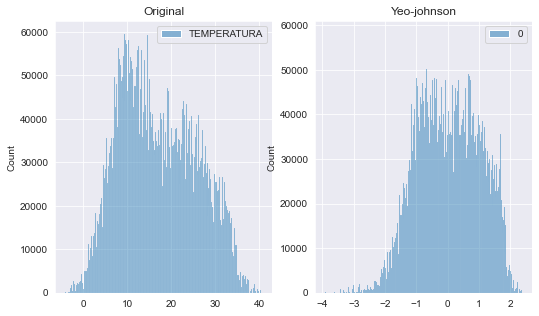

TEMP_SENS_TERMC


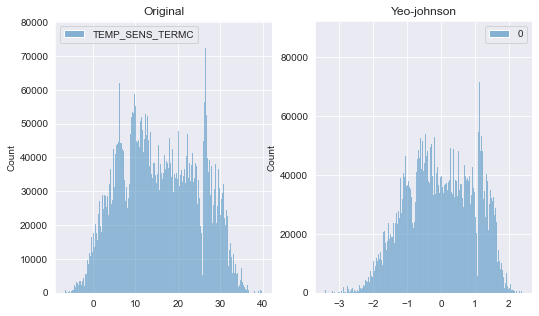

VIENTO


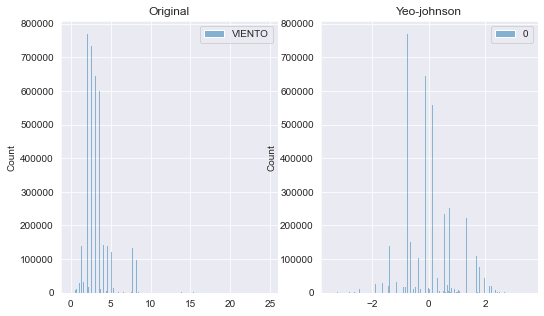

PRESION


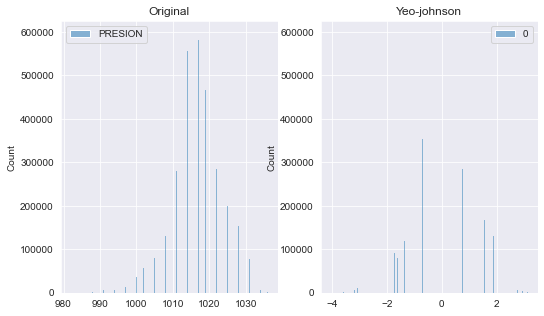

HUMEDAD


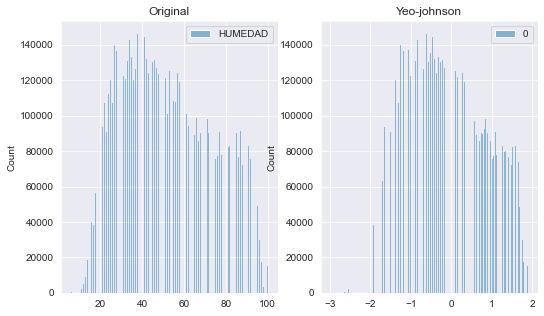

PRECIPITACION_1h


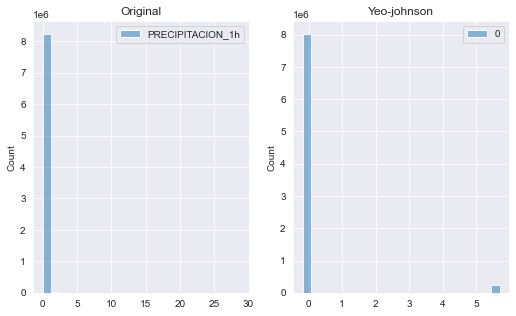

PRECIPITACION_3h


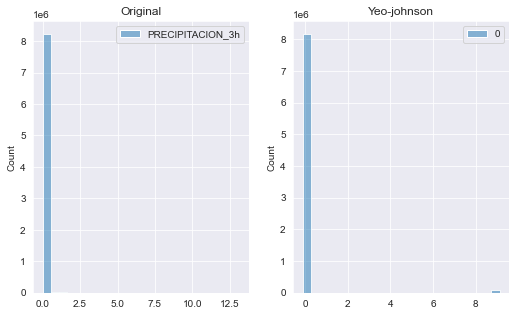

NIEVE_1h


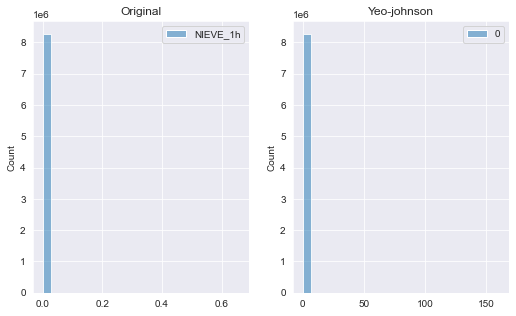

NIEVE_3h


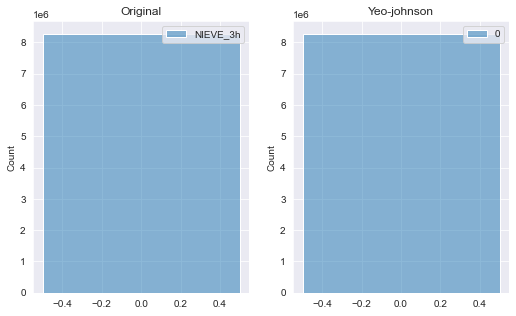

In [34]:
""" Mostrar 2 histogramas por cada variable numérica:
    - Uno con el valor de la variable 
    - Uno con el valor de la variable transformada por Yeo-Johnson """

pt = PowerTransformer(method='yeo-johnson')

for col in num_cols:
    X=data_final[[col]]
    X_new = pt.fit_transform(X)
    
    print(col)
    plt.figure(figsize=(13.2,5))
    plt.subplot(1,3,1)
    plt.title("Original")
    sns.histplot(X)
    plt.subplot(1,3,2)
    plt.title("Yeo-johnson")
    sns.histplot(X_new) 
    plt.show()

In [39]:
############################
### Datos sin agregación ###
############################

data_serie = data_final[['ANIO','MES','DIA','HORA','TEMPERATURA', 'TEMP_SENS_TERMC','VIENTO', 'PRESION', 'HUMEDAD', 'PRECIPITACION_1h','PRECIPITACION_3h',
            'NIEVE_1h', 'NIEVE_3h','ID_TIPO_TIEMPO','DESC_TIEMPO', 'DESC_TIEMPO_detalle','DEMANDA']]
data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],
                                          'month': data_serie["MES"]
                                          ,'day':  data_serie['DIA']
                                         # ,'hour':data_serie['HORA']
                                          },
                                          format='%d-%m-%Y', errors='coerce')
data_serie

,ANIO,MES,DIA,HORA,TEMPERATURA,TEMP_SENS_TERMC,VIENTO,PRESION,HUMEDAD,PRECIPITACION_1h,PRECIPITACION_3h,NIEVE_1h,NIEVE_3h,ID_TIPO_TIEMPO,DESC_TIEMPO,DESC_TIEMPO_detalle,DEMANDA,FECHA
0,2018,1,10,0,2.67,0.05,2.6,"1,018.0",93.0,0.0,0.1,0.0,0.0,701,Mist,mist,1,2018-01-10
1,2018,1,10,0,2.67,0.05,2.6,"1,018.0",93.0,0.0,0.1,0.0,0.0,701,Mist,mist,1,2018-01-10
2,2018,1,10,0,2.67,0.05,2.6,"1,018.0",93.0,0.0,0.1,0.0,0.0,701,Mist,mist,1,2018-01-10
3,2018,1,10,0,2.67,0.05,2.6,"1,018.0",93.0,0.0,0.1,0.0,0.0,701,Mist,mist,1,2018-01-10
4,2018,1,10,0,2.67,0.05,2.6,"1,018.0",93.0,0.0,0.1,0.0,0.0,701,Mist,mist,1,2018-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266476,2020,2,9,9,7.55,5.85,2.6,"1,031.0",90.0,0.0,0.0,0.0,0.0,701,Mist,mist,1,2020-02-09
8266477,2020,2,9,9,7.55,5.85,2.6,"1,031.0",90.0,0.0,0.0,0.0,0.0,701,Mist,mist,1,2020-02-09
8266478,2020,2,9,9,7.55,5.85,2.6,"1,031.0",90.0,0.0,0.0,0.0,0.0,701,Mist,mist,1,2020-02-09
8266479,2020,2,9,9,7.55,5.85,2.6,"1,031.0",90.0,0.0,0.0,0.0,0.0,701,Mist,mist,1,2020-02-09


In [40]:
###############################
### Datos agregados por día ###
###############################

data_serie_temp = data_serie.groupby(['FECHA']).agg(TEMPERATURA=('TEMPERATURA','mean'), TEMP_SENS_TERMC=('TEMP_SENS_TERMC','mean'),
                                                    VIENTO=('VIENTO','mean'), PRESION=('PRESION','mean'), HUMEDAD=('HUMEDAD','mean'),
                                                    PRECIPITACION_1h=('PRECIPITACION_1h','mean'), PRECIPITACION_3h=('PRECIPITACION_3h','mean'), 
                                                    NIEVE_1h=('NIEVE_1h','mean'), NIEVE_3h=('NIEVE_3h','mean'),
                                                    DEMANDA=('DEMANDA','sum'))   
data_serie_temp = data_serie_temp.reset_index()
data_serie_temp

,FECHA,TEMPERATURA,TEMP_SENS_TERMC,VIENTO,PRESION,HUMEDAD,PRECIPITACION_1h,PRECIPITACION_3h,NIEVE_1h,NIEVE_3h,DEMANDA
0,2018-01-01,7.6756502242152465,4.422810951144678,6.524710880339863,"1,030.8860042482888",67.32050979466604,0.0,0.0,0.0,0.0,4399
1,2018-01-02,9.761779525459877,7.550343908291122,5.4446201013063185,"1,031.8926952812583",72.06504932018129,0.0,0.0,0.0,0.0,7767
2,2018-01-03,10.436311010215663,9.05222360953462,5.1961066969353,"1,031.5913734392736",89.55709421112373,0.0,0.0,0.0,0.0,9040
3,2018-01-04,10.88527543052733,9.507113060220345,5.789343245266873,"1,025.549363568296",83.01251470745534,0.0,0.0,0.0,0.0,9541
4,2018-01-05,9.449441022482292,7.171270403449339,5.966638435478903,"1,012.044656606098",81.0146288882045,0.14656760086233445,0.044210040036957186,0.0,0.0,6676
...,...,...,...,...,...,...,...,...,...,...,...
770,2020-02-25,12.594791620727674,11.563306872473357,5.259050349136348,"1,018.7886806321205",52.93325983094451,0.0,0.0,0.0,0.0,13648
771,2020-02-26,11.363087153367289,9.283366581777024,5.475989671760045,"1,020.7689586870401",46.300650820599884,0.0,0.0,0.0,0.0,14223
772,2020-02-27,13.648567744633398,11.86241287984388,6.695957624756064,"1,020.4909395037636",46.21724282129914,0.0,0.0,0.0,0.0,14480
773,2020-02-28,13.401660277204364,12.116307873783546,2.295215275729873,"1,019.5241079327632",47.129607785314064,0.0,0.0,0.0,0.0,13630


### a. EDA: 'TEMPERATURA'

In [41]:
data_serie['TEMPERATURA'].describe()

count          8,266,481.0
mean    17.060468660119906
std      8.717012520715967
min                  -4.12
25%                   9.94
50%                  16.11
75%                   23.9
max                  40.69
Name: TEMPERATURA, dtype: float64

In [42]:
"""Chequear si hay valores raros de temperatura muy negativas"""
print("num de obs. con Temperaura < -5°C =", data_serie.loc[data_serie['TEMPERATURA'] < -5]['ANIO'].count())
print("num de obs. con Temperaura < -10°C =", data_serie.loc[data_serie['TEMPERATURA'] < -10]['ANIO'].count())
print("num de obs. con Temperaura < -15°C =", data_serie.loc[data_serie['TEMPERATURA'] < -15]['ANIO'].count())
print("num de obs. con Temperaura < -20°C =", data_serie.loc[data_serie['TEMPERATURA'] < -20]['ANIO'].count())

num de obs. con Temperaura < -5°C = 0
num de obs. con Temperaura < -10°C = 0
num de obs. con Temperaura < -15°C = 0
num de obs. con Temperaura < -20°C = 0


In [43]:
"""Chequear si hay valores raros de temperatura muy altas"""
print("num de obs. con Temperaura > 42°C =", data_serie.loc[data_serie['TEMPERATURA'] > 42]['ANIO'].count())
print("num de obs. con Temperaura > 44°C =", data_serie.loc[data_serie['TEMPERATURA'] > 43]['ANIO'].count())
print("num de obs. con Temperaura > 46°C =", data_serie.loc[data_serie['TEMPERATURA'] > 44]['ANIO'].count())
print("num de obs. con Temperaura > 48°C =", data_serie.loc[data_serie['TEMPERATURA'] > 45]['ANIO'].count())

num de obs. con Temperaura > 42°C = 0
num de obs. con Temperaura > 44°C = 0
num de obs. con Temperaura > 46°C = 0
num de obs. con Temperaura > 48°C = 0


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='MES'>

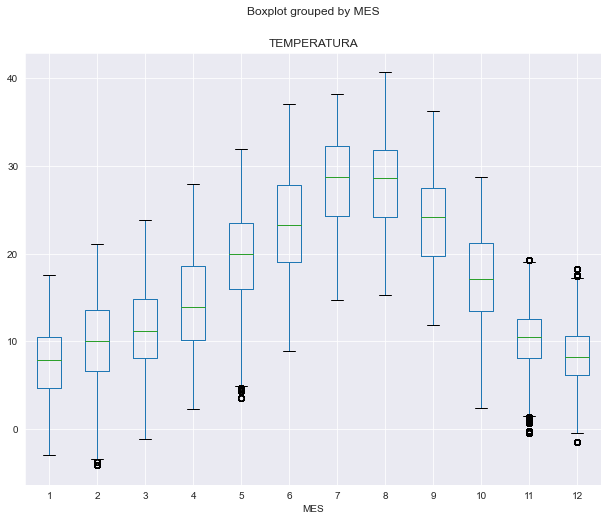

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('TEMPERATURA', by='MES', ax=ax)

<AxesSubplot:xlabel='MES', ylabel='TEMPERATURA'>

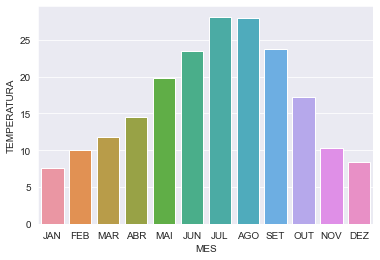

In [45]:
data_mes = data_serie[['MES','TEMPERATURA']]
data_mes = data_mes.groupby(['MES']).agg(TEMPERATURA=('TEMPERATURA', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'TEMPERATURA', data = data_mes) 

In [46]:
data_mes_anio = data_serie[['ANIO','MES','TEMPERATURA']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(TEMPERATURA=('TEMPERATURA', 'mean'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,TEMPERATURA
0,2018,1,7.65827739433531
1,2018,2,7.022250334619833
2,2018,3,9.129467111090392
3,2018,4,15.099818040260972
4,2018,5,18.575323831909966
5,2018,6,23.24232464279371
6,2018,7,27.425967264244903
7,2018,8,28.96716248755782
8,2018,9,25.04160320392633
9,2018,10,16.778467858315054


**CONCLUSIÓN**: Está OK, sin valores dicrepantes (ouliers). No hay necesidad de modificaciones.

#### a1. Correlación

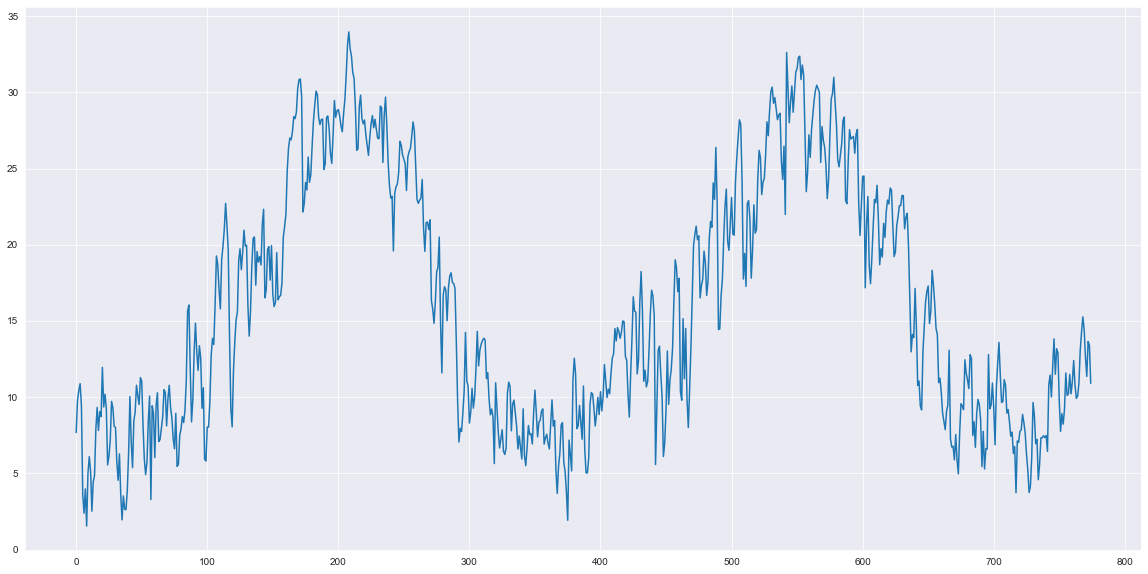

In [47]:
plot = data_serie_temp['TEMPERATURA'].plot(figsize=(20, 10))

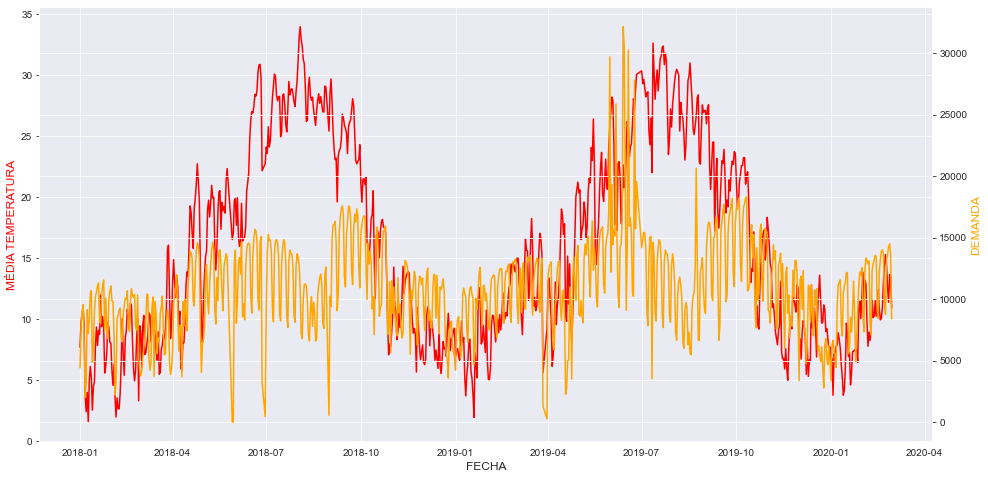

In [48]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['TEMPERATURA'],
        color="red")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA TEMPERATURA',
              color="red",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.show()

In [49]:
# Measuring correlation between two variables
data_serie_temp[['DEMANDA','TEMPERATURA']].corr()

,DEMANDA,TEMPERATURA
DEMANDA,1.0,0.4247075252376589
TEMPERATURA,0.4247075252376589,1.0


**CONCLUSIÓN**: Temperatura y Demanda están muy correlacionados, por lo que Temperatura ccertamente será una varaiable muy predictora.

<AxesSubplot:xlabel='DEMANDA', ylabel='TEMPERATURA'>

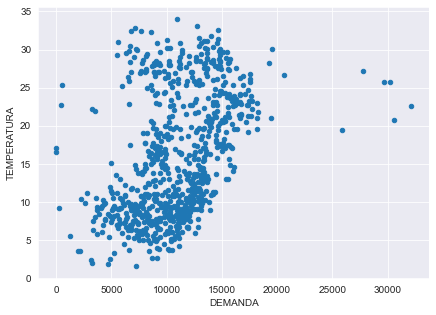

In [50]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='TEMPERATURA', marker='o', figsize=(7,5))

### b. EDA: 'TEMP_SENS_TERMC'

In [51]:
data_serie['TEMP_SENS_TERMC'].describe()

count          8,266,481.0
mean    15.827384540039214
std      9.125937458774128
min                  -6.59
25%                   8.76
50%                  15.26
75%                  23.39
max                  39.88
Name: TEMP_SENS_TERMC, dtype: float64

In [52]:
"""Chequear si hay valores raros de temperatura muy negativas"""
print("num de obs. con Sensación < -5°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] < -5]['ANIO'].count())
print("num de obs. con Sensación < -10°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] < -10]['ANIO'].count())
print("num de obs. con Sensación < -15°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] < -15]['ANIO'].count())
print("num de obs. con Sensación < -20°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] < -20]['ANIO'].count())

num de obs. con Sensación < -5°C = 3138
num de obs. con Sensación < -10°C = 0
num de obs. con Sensación < -15°C = 0
num de obs. con Sensación < -20°C = 0


In [53]:
"""Chequear si hay valores raros de temperatura muy altas"""
print("num de obs. con Sensación > 42°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] > 42]['ANIO'].count())
print("num de obs. con Sensación > 44°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] > 43]['ANIO'].count())
print("num de obs. con Sensación > 46°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] > 44]['ANIO'].count())
print("num de obs. con Sensación > 48°C =", data_serie.loc[data_serie['TEMP_SENS_TERMC'] > 45]['ANIO'].count())

num de obs. con Sensación > 42°C = 0
num de obs. con Sensación > 44°C = 0
num de obs. con Sensación > 46°C = 0
num de obs. con Sensación > 48°C = 0


<AxesSubplot:title={'center':'TEMP_SENS_TERMC'}, xlabel='MES'>

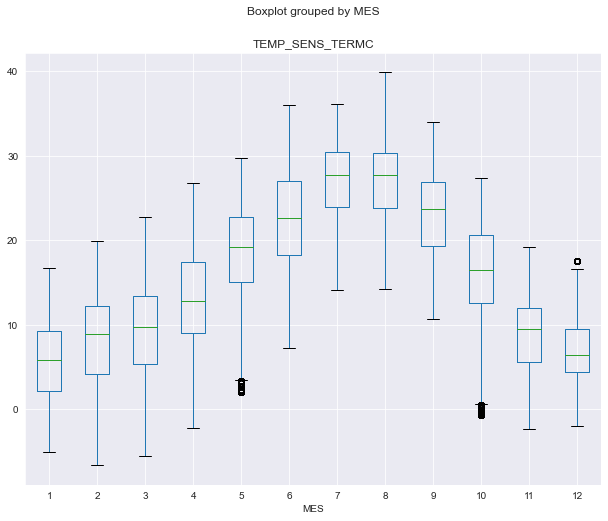

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('TEMP_SENS_TERMC', by='MES', ax=ax)

<AxesSubplot:xlabel='MES', ylabel='TEMP_SENS_TERMC'>

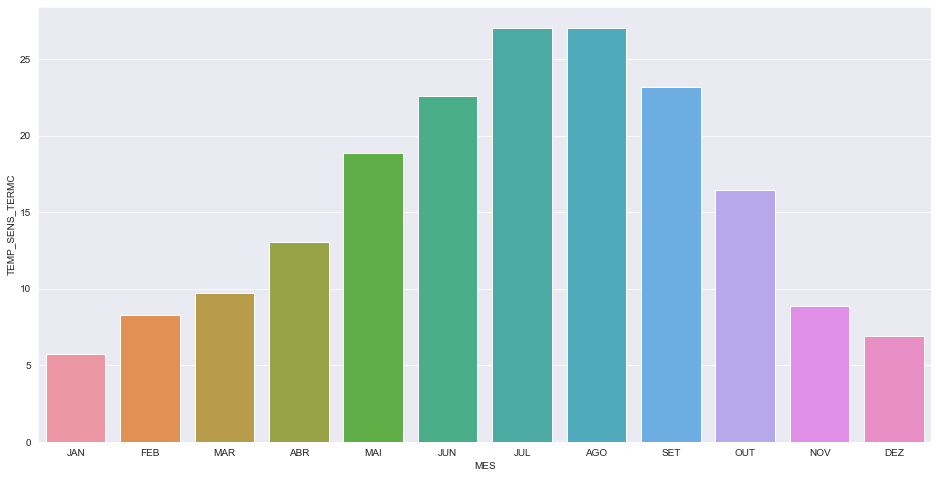

In [55]:
data_mes = data_serie[['MES','TEMP_SENS_TERMC']]
data_mes = data_mes.groupby(['MES']).agg(TEMP_SENS_TERMC=('TEMP_SENS_TERMC', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'TEMP_SENS_TERMC', data = data_mes) 

In [56]:
data_mes_anio = data_serie[['ANIO','MES','TEMP_SENS_TERMC']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(TEMPERATURA=('TEMP_SENS_TERMC', 'mean'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,TEMPERATURA
0,2018,1,5.77449970376184
1,2018,2,4.61605945620487
2,2018,3,6.576458626637453
3,2018,4,13.81141226188331
4,2018,5,17.79199623358685
5,2018,6,22.511098750007655
6,2018,7,26.392991586727472
7,2018,8,27.95830145939458
8,2018,9,24.463155950148895
9,2018,10,15.833128493802977


**CONCLUSIÓN**: Misma conclusión para TEMPERATURA

#### b1. Correlación 

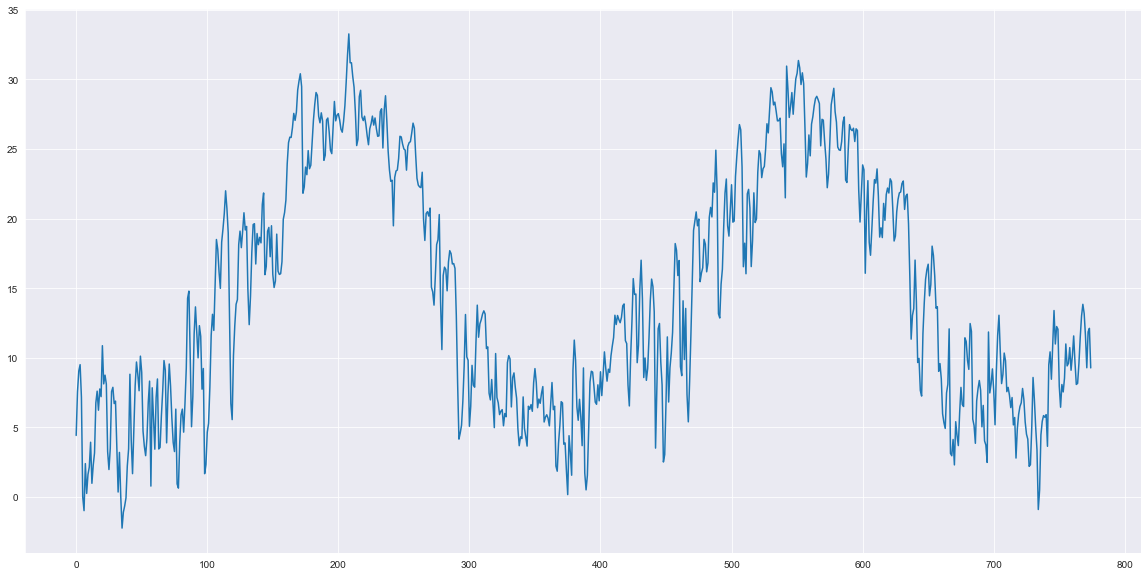

In [57]:
plot = data_serie_temp['TEMP_SENS_TERMC'].plot(figsize=(20, 10))

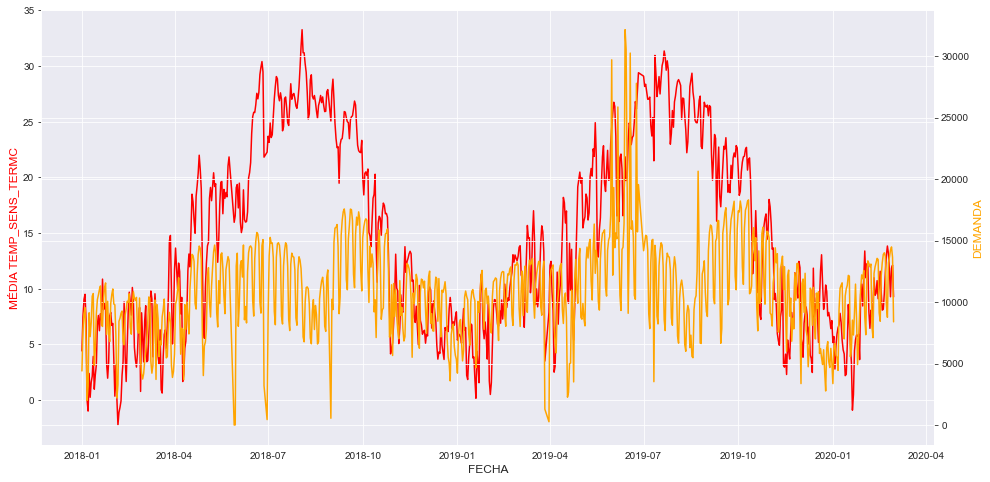

<Figure size 1152x576 with 0 Axes>

In [58]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['TEMP_SENS_TERMC'],
        color="red")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA TEMP_SENS_TERMC',
              color="red",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.figure()
plt.show()

In [59]:
# Measuring correlation between two variables
data_serie_temp[['DEMANDA','TEMP_SENS_TERMC']].corr()

,DEMANDA,TEMP_SENS_TERMC
DEMANDA,1.0,0.43245655027801694
TEMP_SENS_TERMC,0.43245655027801694,1.0


In [60]:
data_serie_temp[['TEMPERATURA','TEMP_SENS_TERMC']].corr()

,TEMPERATURA,TEMP_SENS_TERMC
TEMPERATURA,1.0,0.9961921276560355
TEMP_SENS_TERMC,0.9961921276560355,1.0


<AxesSubplot:xlabel='DEMANDA', ylabel='TEMP_SENS_TERMC'>

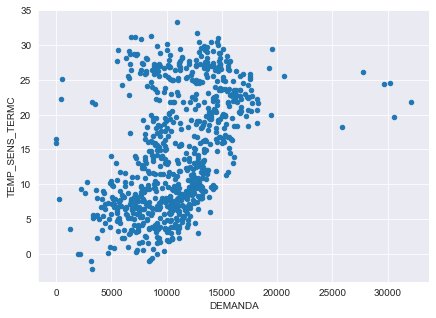

In [61]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='TEMP_SENS_TERMC', marker='o', figsize=(7,5))

### c. EDA: 'VIENTO'

In [62]:
data_serie['VIENTO'].describe()

count          8,266,481.0
mean     3.885918858380983
std     2.3672416266089087
min                    0.0
25%                    2.1
50%                    3.1
75%                   5.14
max                  24.69
Name: VIENTO, dtype: float64

<AxesSubplot:title={'center':'VIENTO'}, xlabel='MES'>

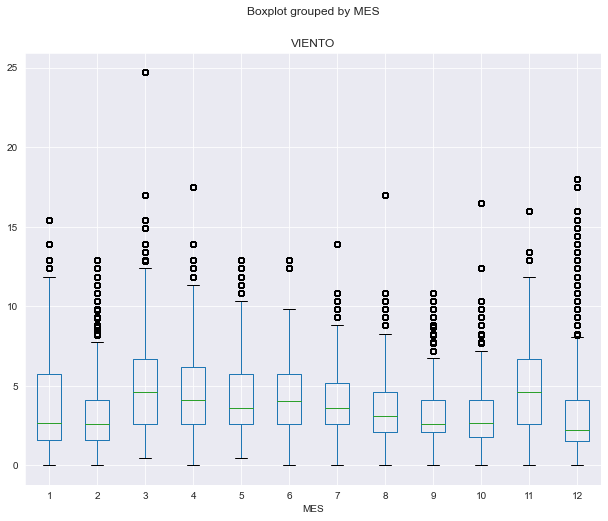

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('VIENTO', by='MES', ax=ax)

In [64]:
data_mes_anio = data_serie[['ANIO','MES','VIENTO']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(TEMPERATURA=('VIENTO', 'mean'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,TEMPERATURA
0,2018,1,3.4325330286312257
1,2018,2,4.421338695913956
2,2018,3,6.172192578434572
3,2018,4,4.623148019079935
4,2018,5,3.5959133032620323
5,2018,6,3.5652747410905126
6,2018,7,3.9242053519945483
7,2018,8,3.499956342584461
8,2018,9,2.716874908091614
9,2018,10,3.268600004167817


<AxesSubplot:xlabel='MES', ylabel='VIENTO'>

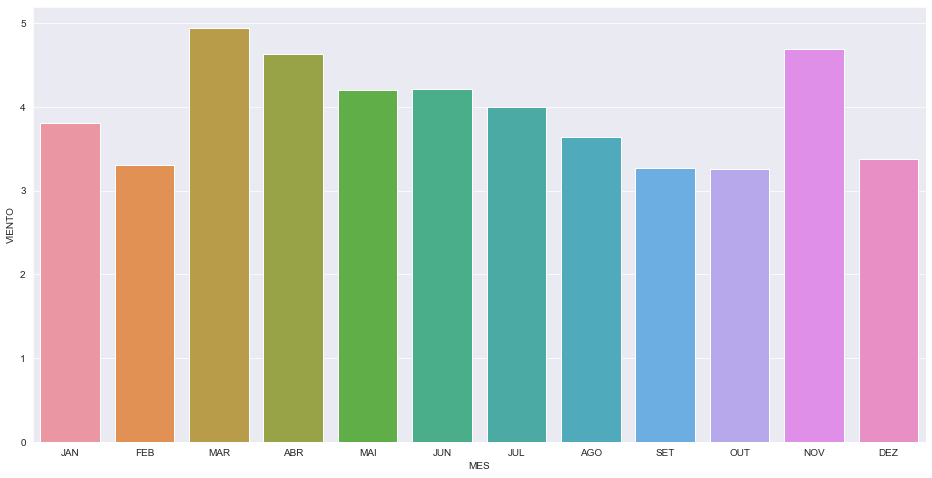

In [65]:
data_mes = data_serie[['MES','VIENTO']]
data_mes = data_mes.groupby(['MES']).agg(VIENTO=('VIENTO', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'VIENTO', data = data_mes) 

#### c1. Correlación 

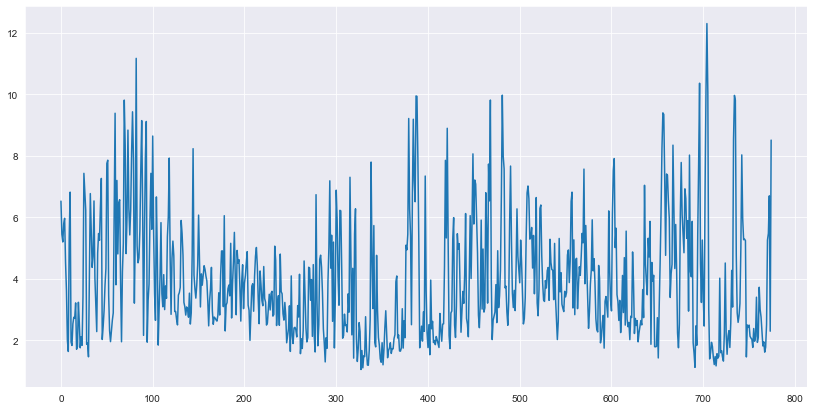

In [66]:
plot = data_serie_temp['VIENTO'].plot(figsize=(14, 7))

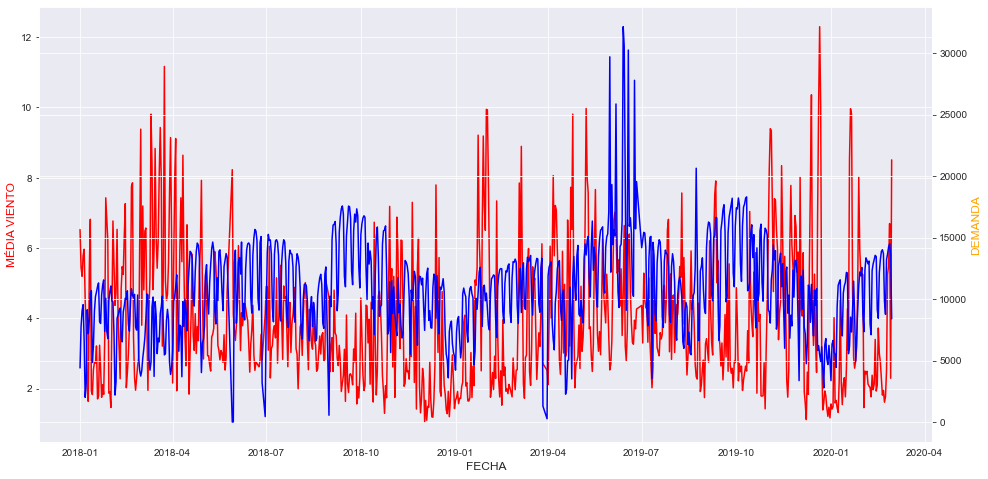

<Figure size 1152x576 with 0 Axes>

In [67]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['VIENTO'],
        color="red")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA VIENTO',
              color="red",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="blue")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.figure()
plt.show()

In [68]:
data_serie_temp[['DEMANDA','VIENTO']].corr()

,DEMANDA,VIENTO
DEMANDA,1.0,-0.09883105814548744
VIENTO,-0.09883105814548744,1.0


<AxesSubplot:xlabel='DEMANDA', ylabel='VIENTO'>

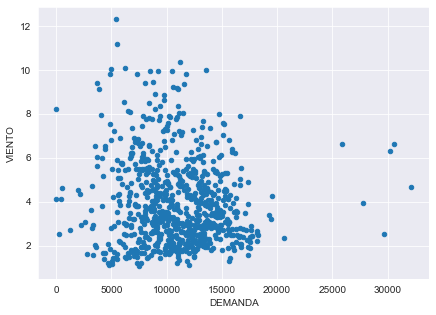

In [69]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='VIENTO', marker='o', figsize=(7,5))

### d. EDA: 'PRESION'

In [70]:
data_serie['PRESION'].describe()

count           8,266,481.0
mean    1,016.6489446960563
std       6.998147578756391
min                   982.0
25%                 1,013.0
50%                 1,017.0
75%                 1,021.0
max                 1,036.0
Name: PRESION, dtype: float64

<AxesSubplot:title={'center':'PRESION'}, xlabel='MES'>

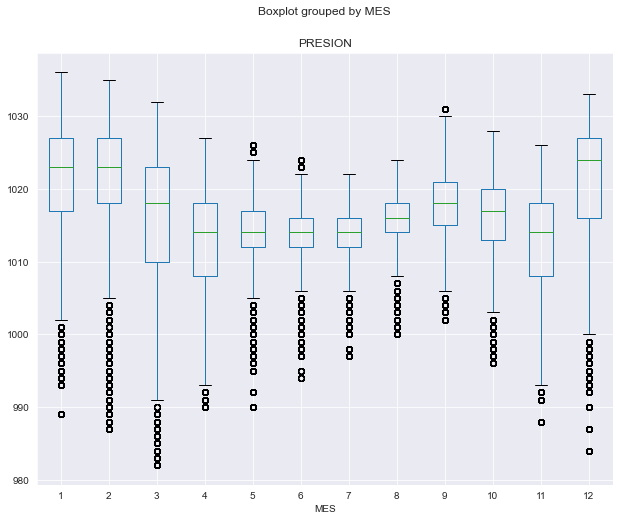

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('PRESION', by='MES', ax=ax)

<AxesSubplot:xlabel='MES', ylabel='PRESION'>

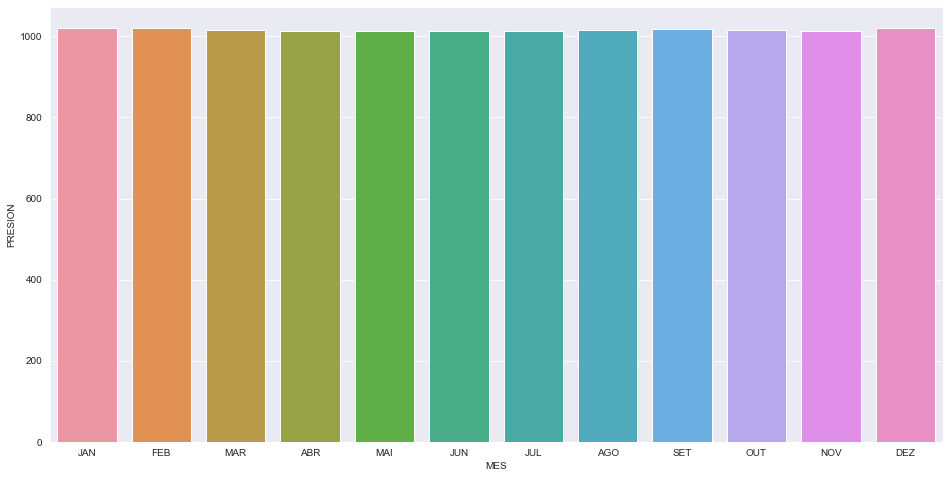

In [72]:
data_mes = data_serie[['MES','PRESION']]
data_mes = data_mes.groupby(['MES']).agg(PRESION=('PRESION', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'PRESION', data = data_mes) 

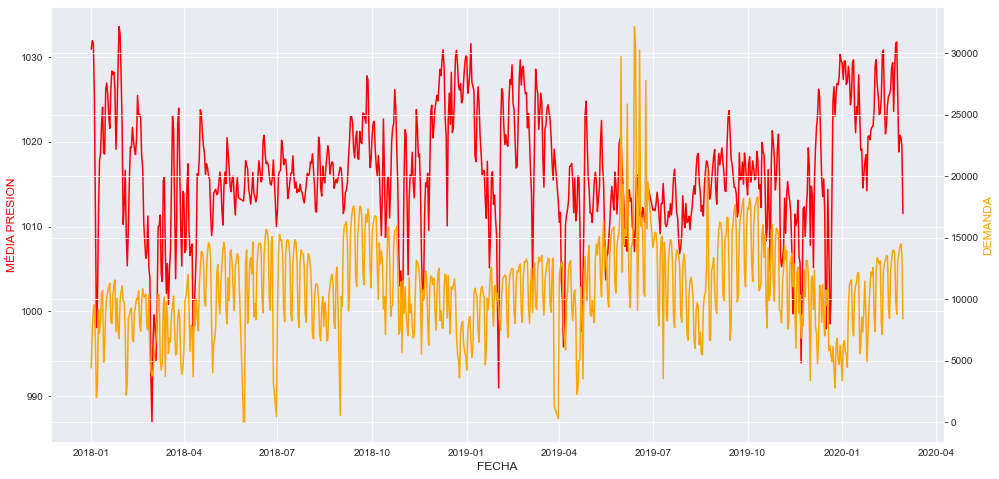

<Figure size 1152x576 with 0 Axes>

In [73]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['PRESION'],
        color="red")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA PRESION',
              color="red",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.figure()
plt.show()

<AxesSubplot:xlabel='DEMANDA', ylabel='PRESION'>

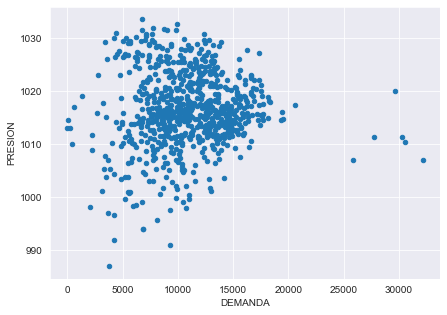

In [74]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='PRESION', marker='o', figsize=(7,5))

**CONCLUSIÓN**: Es practicamente constante. Se puede discutir si vale la pena poner en el modelo. Parece tener muy poca correlación con las demandas de bicimad.

### e. EDA: 'HUMEDAD'

In [75]:
data_serie['HUMEDAD'].describe()

count         8,266,481.0
mean    52.90680956019859
std     21.74267117522463
min                   6.0
25%                  35.0
50%                  51.0
75%                  70.0
max                 100.0
Name: HUMEDAD, dtype: float64

<AxesSubplot:title={'center':'HUMEDAD'}, xlabel='MES'>

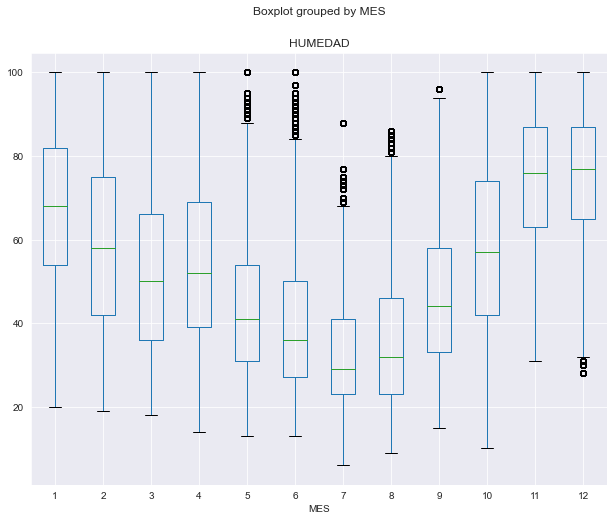

In [76]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('HUMEDAD', by='MES', ax=ax)

**OJO**: Hay unos outliers en los meses más secos.A lo mejor están correctos. 

<AxesSubplot:xlabel='MES', ylabel='HUMEDAD'>

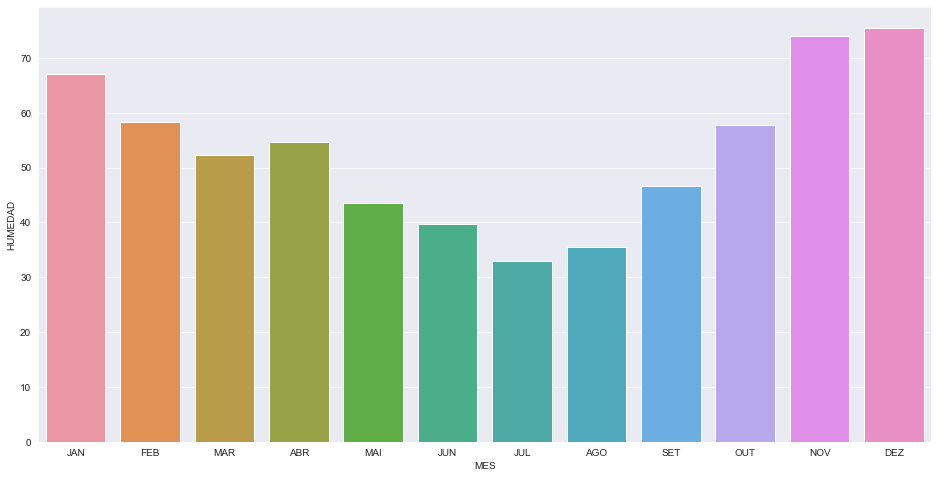

In [77]:
data_mes = data_serie[['MES','HUMEDAD']]
data_mes = data_mes.groupby(['MES']).agg(HUMEDAD=('HUMEDAD', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'HUMEDAD', data = data_mes) 

In [78]:
data_mes_anio = data_serie[['ANIO','MES','HUMEDAD']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(HUMEDAD=('HUMEDAD', 'mean'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,HUMEDAD
0,2018,1,69.31082692766402
1,2018,2,56.125409882222485
2,2018,3,63.22318306838842
3,2018,4,56.68233882181749
4,2018,5,49.926904583046294
5,2018,6,46.68545023609605
6,2018,7,34.2724327724485
7,2018,8,33.75818256338193
8,2018,9,45.38847376934672
9,2018,10,55.40841482284172


#### e1. Correlación

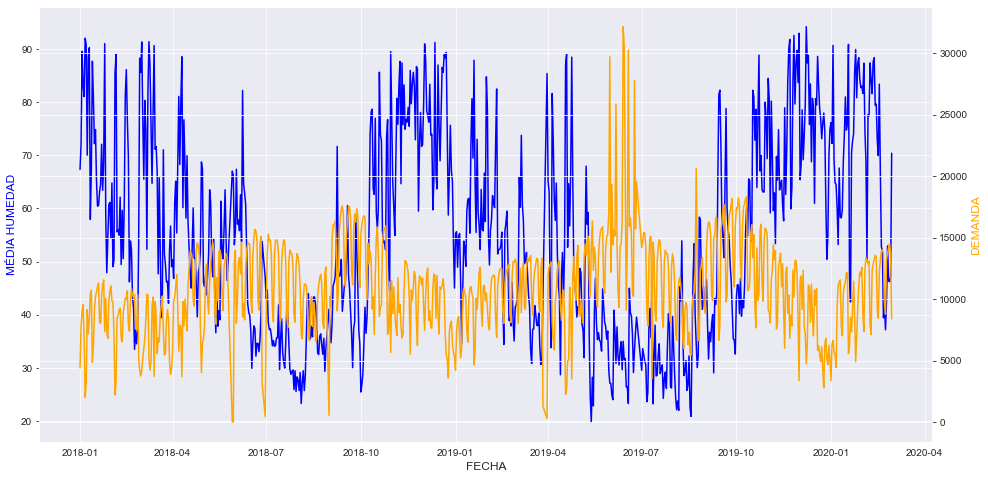

In [79]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['HUMEDAD'],
        color="blue")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA HUMEDAD',
              color="blue",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.show()

In [80]:
# Measuring correlation between two variables
data_serie_temp[['HUMEDAD','DEMANDA']].corr()

,HUMEDAD,DEMANDA
HUMEDAD,1.0,-0.3859941086715101
DEMANDA,-0.3859941086715101,1.0


In [81]:
# Measuring correlation between two variables
data_serie_temp[['HUMEDAD','TEMPERATURA']].corr()

,HUMEDAD,TEMPERATURA
HUMEDAD,1.0,-0.7290682901514147
TEMPERATURA,-0.7290682901514147,1.0


<AxesSubplot:xlabel='DEMANDA', ylabel='HUMEDAD'>

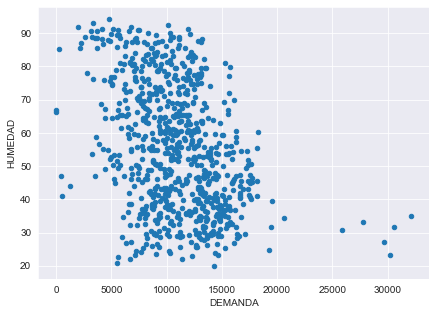

In [82]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='HUMEDAD', marker='o', figsize=(7,5))

**CONCLUSIÓN**: 

### f. EDA: 'PRECIPITACION_1h'

In [83]:
data_serie['PRECIPITACION_1h'].describe()

count           8,266,481.0
mean    0.01920421277205013
std     0.21989735265986882
min                     0.0
25%                     0.0
50%                     0.0
75%                     0.0
max                    28.7
Name: PRECIPITACION_1h, dtype: float64

<AxesSubplot:title={'center':'PRECIPITACION_1h'}, xlabel='MES'>

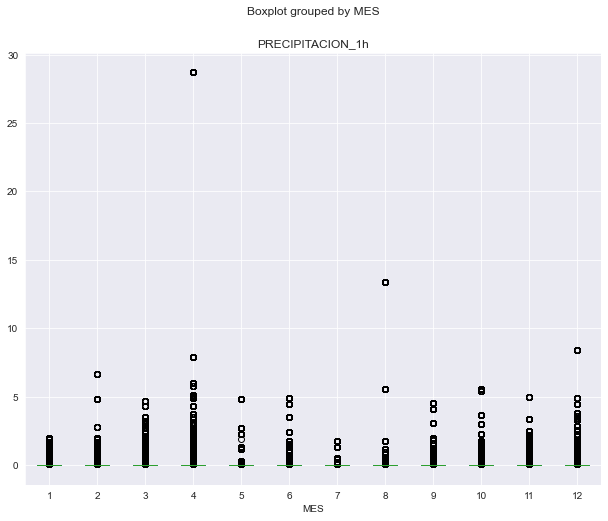

In [84]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('PRECIPITACION_1h', by='MES', ax=ax)

<AxesSubplot:xlabel='MES', ylabel='PRECIPITACION_1h'>

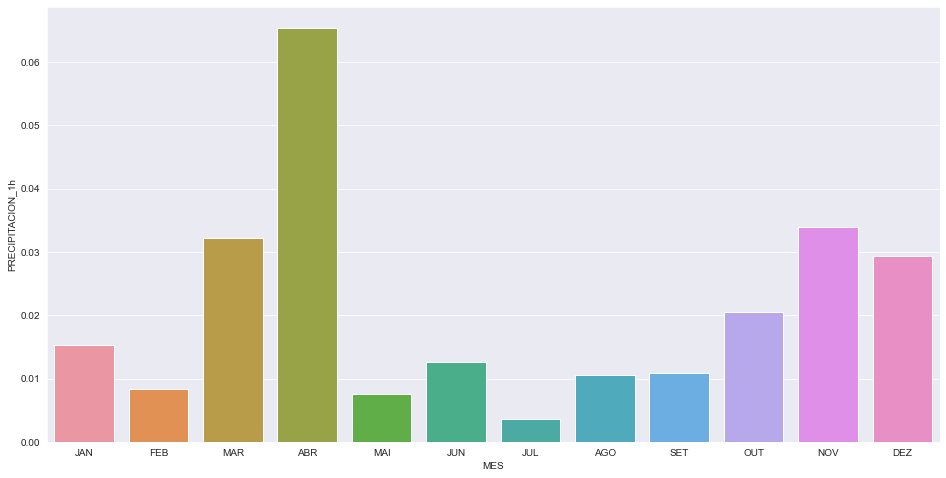

In [85]:
data_mes = data_serie[['MES','PRECIPITACION_1h']]
data_mes = data_mes.groupby(['MES']).agg(PRECIPITACION_1h=('PRECIPITACION_1h', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'PRECIPITACION_1h', data = data_mes) 

In [86]:
data_mes_anio = data_serie[['ANIO','MES','PRECIPITACION_1h']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(PRECIPITACION_1h=('PRECIPITACION_1h', 'sum')) # Es la suma
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,PRECIPITACION_1h
0,2018,1,"4,208.35"
1,2018,2,"5,397.49"
2,2018,3,"13,578.56"
3,2018,4,"8,278.49"
4,2018,5,"5,011.84"
5,2018,6,"6,998.81"
6,2018,7,0.0
7,2018,8,91.0
8,2018,9,"2,535.29"
9,2018,10,"7,627.65"


#### e1. Correlación

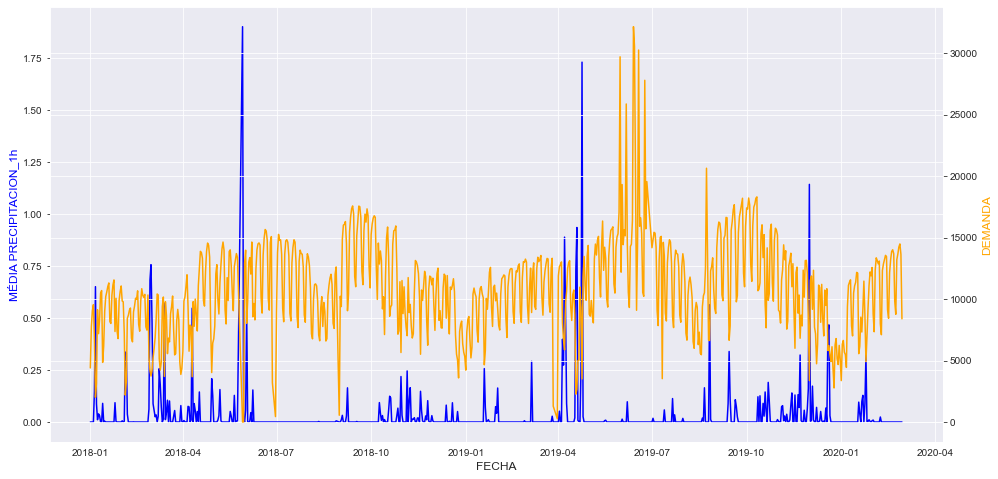

In [87]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['PRECIPITACION_1h'],
        color="blue")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA PRECIPITACION_1h',
              color="blue",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.show()

In [88]:
# Measuring correlation between two variables
data_serie_temp[['PRECIPITACION_1h','DEMANDA']].corr()

,PRECIPITACION_1h,DEMANDA
PRECIPITACION_1h,1.0,-0.31620740535565545
DEMANDA,-0.31620740535565545,1.0


<AxesSubplot:xlabel='DEMANDA', ylabel='PRECIPITACION_1h'>

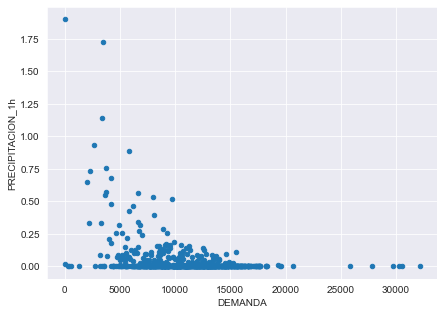

In [89]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='PRECIPITACION_1h', marker='o', figsize=(7,5))

**CONCLUSIÓN**: Parece tener correlación cuando "PRECIPITACION_1h" es diferente de zero. Pero todos los eventos de lluvia son muy poco frecuentes. 

### g. EDA: 'PRECIPITACION_3h'

In [90]:
data_serie['PRECIPITACION_3h'].describe()

count            8,266,481.0
mean    0.011011360214829123
std      0.19134618334138384
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max                    13.15
Name: PRECIPITACION_3h, dtype: float64

<AxesSubplot:title={'center':'PRECIPITACION_3h'}, xlabel='MES'>

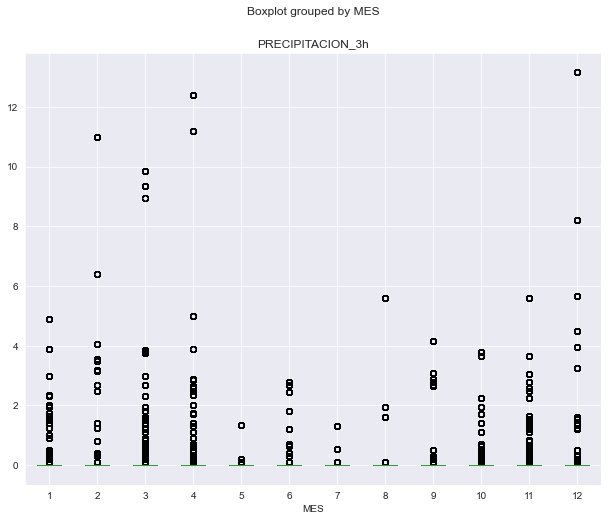

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('PRECIPITACION_3h', by='MES', ax=ax)

<AxesSubplot:xlabel='MES', ylabel='PRECIPITACION_3h'>

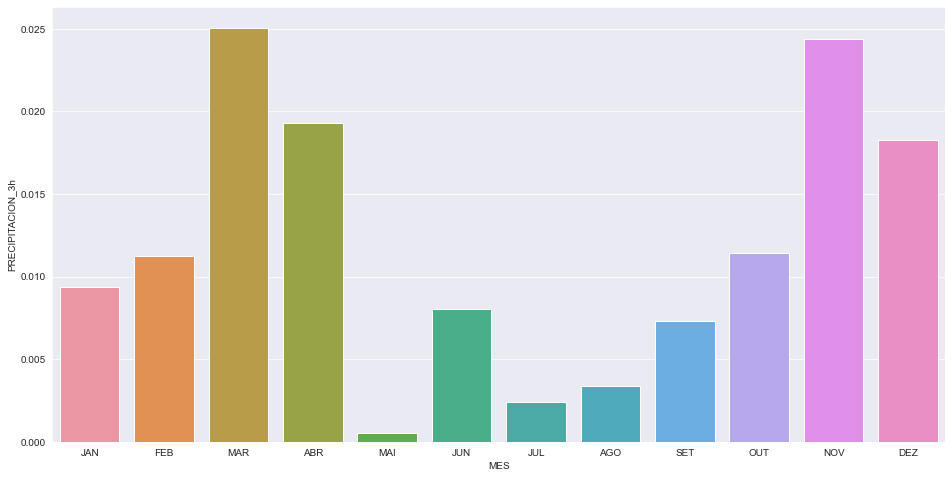

In [92]:
data_mes = data_serie[['MES','PRECIPITACION_3h']]
data_mes = data_mes.groupby(['MES']).agg(PRECIPITACION_3h=('PRECIPITACION_3h', 'mean'))   
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'PRECIPITACION_3h', data = data_mes) 

In [93]:
data_mes_anio = data_serie[['ANIO','MES','PRECIPITACION_3h']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(PRECIPITACION_3h=('PRECIPITACION_3h', 'sum')) # Es la suma
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,PRECIPITACION_3h
0,2018,1,"3,638.0"
1,2018,2,"3,441.3"
2,2018,3,"11,323.45"
3,2018,4,"4,432.35"
4,2018,5,295.8
5,2018,6,"4,928.65"
6,2018,7,61.300000000000004
7,2018,8,0.0
8,2018,9,"1,824.3999999999999"
9,2018,10,"4,532.2"


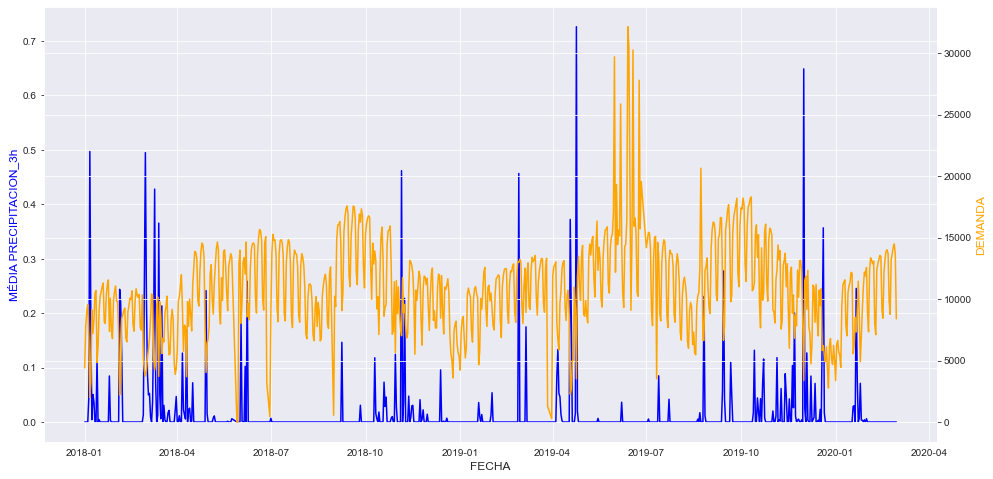

In [94]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['PRECIPITACION_3h'],
        color="blue")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA PRECIPITACION_3h',
              color="blue",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.show()

In [95]:
# Measuring correlation between two variables
data_serie_temp[['PRECIPITACION_3h','DEMANDA']].corr()

,PRECIPITACION_3h,DEMANDA
PRECIPITACION_3h,1.0,-0.29753016287423206
DEMANDA,-0.29753016287423206,1.0


In [96]:
# Measuring correlation between two variables
data_serie_temp[['PRECIPITACION_3h','PRECIPITACION_1h']].corr()

,PRECIPITACION_3h,PRECIPITACION_1h
PRECIPITACION_3h,1.0,0.7031253679707685
PRECIPITACION_1h,0.7031253679707685,1.0


<AxesSubplot:xlabel='DEMANDA', ylabel='PRECIPITACION_3h'>

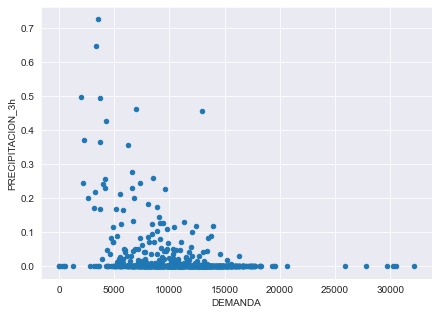

In [97]:
# Visualizing correlation between two variables using scatter plot
data_serie_temp.plot.scatter(x='DEMANDA', y='PRECIPITACION_3h', marker='o', figsize=(7,5))

**CONCLUSIÓN**: La misma que para la variable "PRECIPITACION_1h". 

### h. EDA: 'NIEVE_1h' y 'NIEVE_3h'

In [98]:
data_serie['NIEVE_1h'].describe()

count             8,266,481.0
mean    1.049176789978718e-05
std      0.001955819606658519
min                       0.0
25%                       0.0
50%                       0.0
75%                       0.0
max                      0.66
Name: NIEVE_1h, dtype: float64

In [99]:
data_serie['NIEVE_3h'].describe()

count   8,266,481.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0
Name: NIEVE_3h, dtype: float64

<AxesSubplot:title={'center':'NIEVE_1h'}, xlabel='MES'>

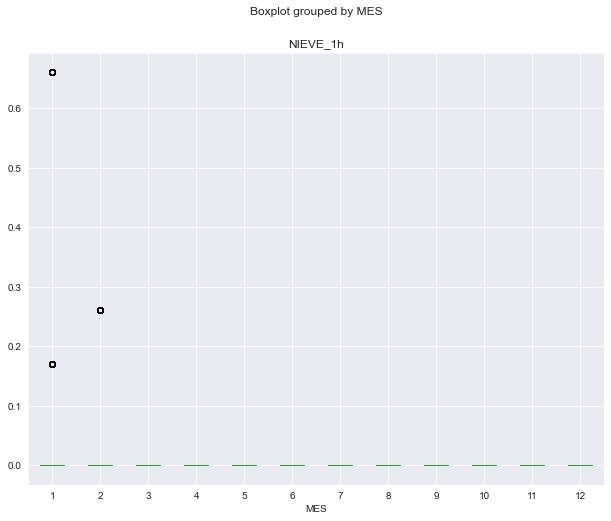

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('NIEVE_1h', by='MES', ax=ax)

<AxesSubplot:title={'center':'NIEVE_3h'}, xlabel='MES'>

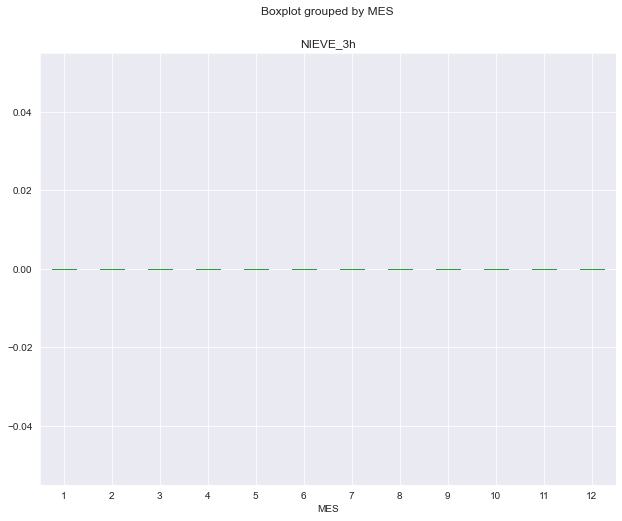

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_serie.boxplot('NIEVE_3h', by='MES', ax=ax)

<AxesSubplot:xlabel='MES', ylabel='NIEVE_1h'>

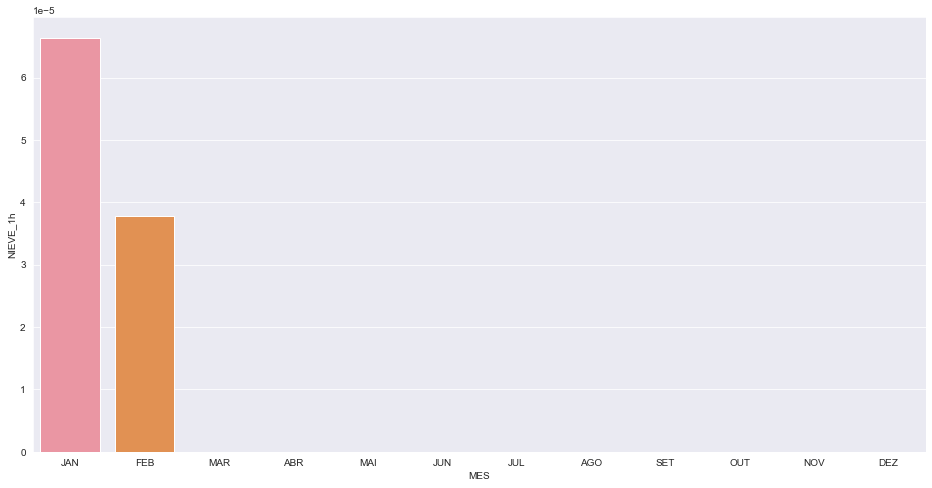

In [102]:
data_mes = data_serie[['MES','NIEVE_1h']]
data_mes = data_mes.groupby(['MES']).agg(NIEVE_1h=('NIEVE_1h', 'mean'))  
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'NIEVE_1h', data = data_mes) 

<AxesSubplot:xlabel='MES', ylabel='NIEVE_3h'>

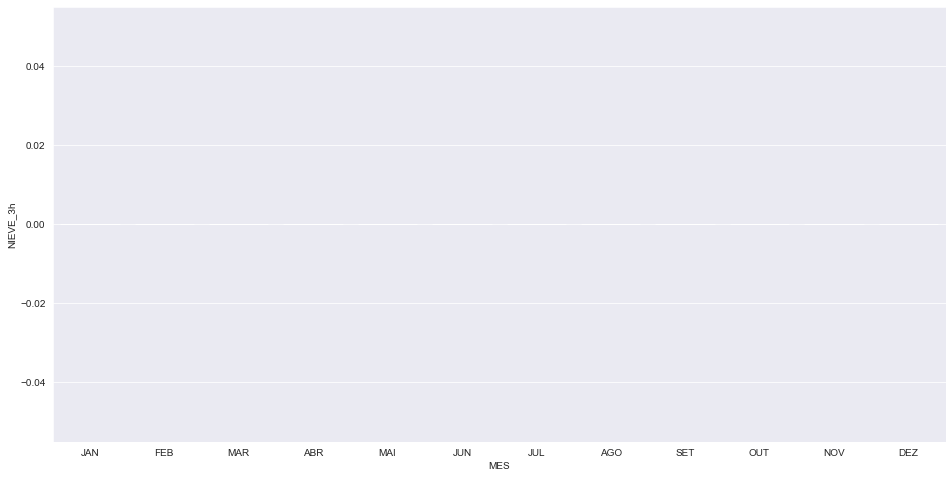

In [103]:
data_mes = data_serie[['MES','NIEVE_3h']]
data_mes = data_mes.groupby(['MES']).agg(NIEVE_3h=('NIEVE_3h', 'sum'))  
data_mes = data_mes.reset_index() 
conditionlist = [
    (data_mes['MES'] == 1),
    (data_mes['MES'] == 2),
    (data_mes['MES'] == 3),
    (data_mes['MES'] == 4),
    (data_mes['MES'] == 5),
    (data_mes['MES'] == 6),
    (data_mes['MES'] == 7),
    (data_mes['MES'] == 8),
    (data_mes['MES'] == 9),
    (data_mes['MES'] == 10),
    (data_mes['MES'] == 11),
    (data_mes['MES'] == 12)]
choicelist = ['JAN','FEB','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
data_mes['MES'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x = 'MES', y = 'NIEVE_3h', data = data_mes) 

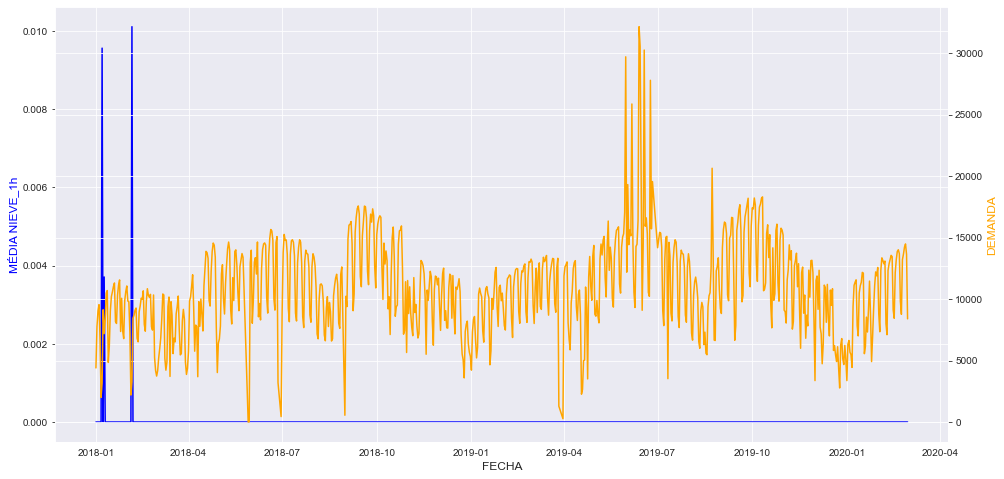

In [104]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['NIEVE_1h'],
        color="blue")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA NIEVE_1h',
              color="blue",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.show()

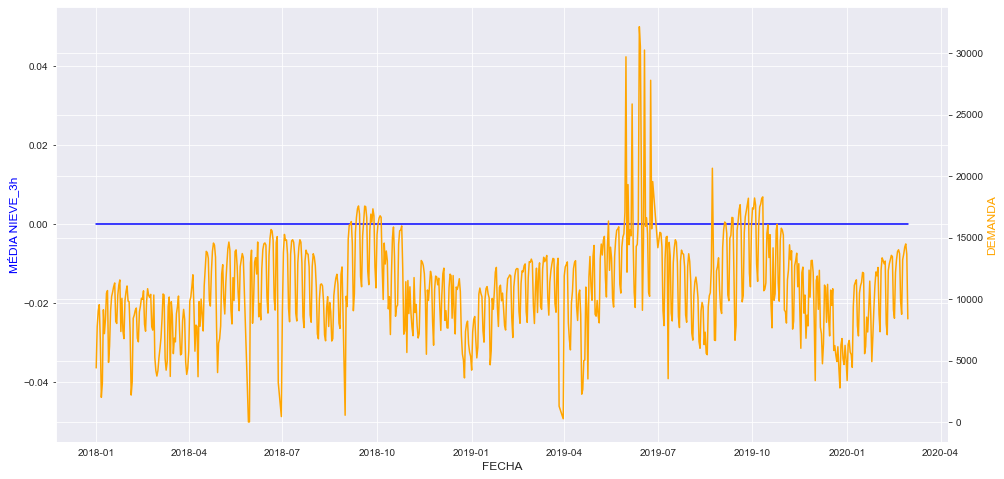

In [105]:
# create figure and axis objects with subplots()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
# make a plot
ax.plot(data_serie_temp['FECHA'],
        data_serie_temp['NIEVE_3h'],
        color="blue")
# set x-axis label
ax.set_xlabel('FECHA', fontsize = 12)
# set y-axis label
ax.set_ylabel('MÉDIA NIEVE_3h',
              color="blue",
              fontsize=12)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_serie_temp['FECHA'], data_serie_temp['DEMANDA'],color="orange")
ax2.set_ylabel('DEMANDA',color="orange",fontsize=12)
plt.show()

**CONCLUSIÓN**: Las variables de nieve son absolutamente irrelevantes para el modelo. Las quitaría de la modelización.

## 2. Variables Categóricas

In [106]:
data_cat = data_final[['ANIO','MES','DIA','HORA','ID_TIPO_TIEMPO','DESC_TIEMPO', 'DESC_TIEMPO_detalle', 'DEMANDA']]
data_cat

,ANIO,MES,DIA,HORA,ID_TIPO_TIEMPO,DESC_TIEMPO,DESC_TIEMPO_detalle,DEMANDA
0,2018,1,10,0,701,Mist,mist,1
1,2018,1,10,0,701,Mist,mist,1
2,2018,1,10,0,701,Mist,mist,1
3,2018,1,10,0,701,Mist,mist,1
4,2018,1,10,0,701,Mist,mist,1
...,...,...,...,...,...,...,...,...
8266476,2020,2,9,9,701,Mist,mist,1
8266477,2020,2,9,9,701,Mist,mist,1
8266478,2020,2,9,9,701,Mist,mist,1
8266479,2020,2,9,9,701,Mist,mist,1


### a. EDA: 'ID_TIPO_TIEMPO'

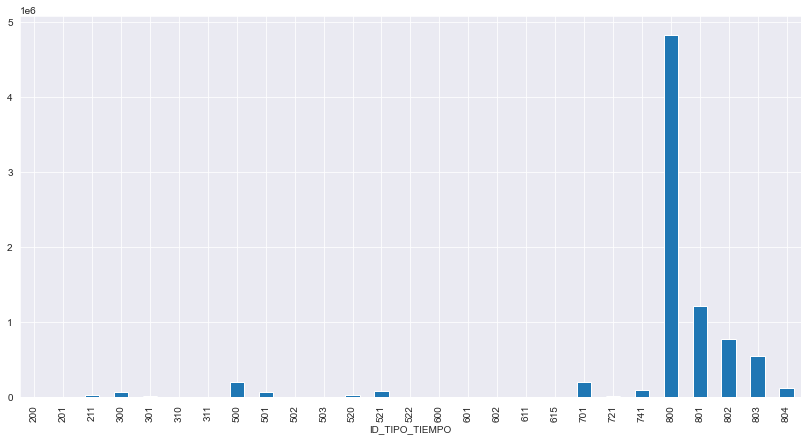

In [107]:
""" Barplot para la variable categórica """
plt.rcParams["figure.figsize"] = (14,7)
k = data_cat.groupby(['ID_TIPO_TIEMPO']).size()
k.plot(kind='bar')
plt.show()

In [108]:
data_cat.groupby('ID_TIPO_TIEMPO').size().sort_values(ascending=False)

ID_TIPO_TIEMPO
800    4828636
801    1216759
802     767427
803     550404
500     195597
701     193040
804     124532
741      95817
521      74760
501      67324
300      61205
211      29860
520      28540
721       9921
301       9863
502       5107
522       2427
200       1680
201       1181
600        588
310        584
601        386
311        287
615        191
611        153
503        137
602         75
dtype: int64

In [109]:
""" Transformar la variable ID_TIPO_TIEMPO en 10 variables dummy que nos permitan identificar 10 tipos de ID_TIPO_TIEMPO, 
    los 10 más comunes y el resto """
# Transformar la var ID_TIPO_TIEMPO en 10 categorias: (las var más frecuentes), y las demás en 'otras':

data_cat['ID_TIPO_TIEMPO'] = data_cat['ID_TIPO_TIEMPO'].apply(lambda x:x if (x == '800.0' or
                                                                             x == '801.0' or 
                                                                             x == '802.0' or
                                                                             x == '803.0' or
                                                                             x == '701.0' or
                                                                             x == '500.0') else 'Otros')
# Check
data_cat.groupby('ID_TIPO_TIEMPO').size().sort_values(ascending=False)

ID_TIPO_TIEMPO
Otros    8266481
dtype: int64

In [110]:
# Crear la variable dummy de la variable transformada:
#data_cat = pd.get_dummies(data_cat, columns=['ID_TIPO_TIEMPO'] , prefix_sep='_', drop_first = False)
#data_cat

### b. EDA: 'DESC_TIEMPO'

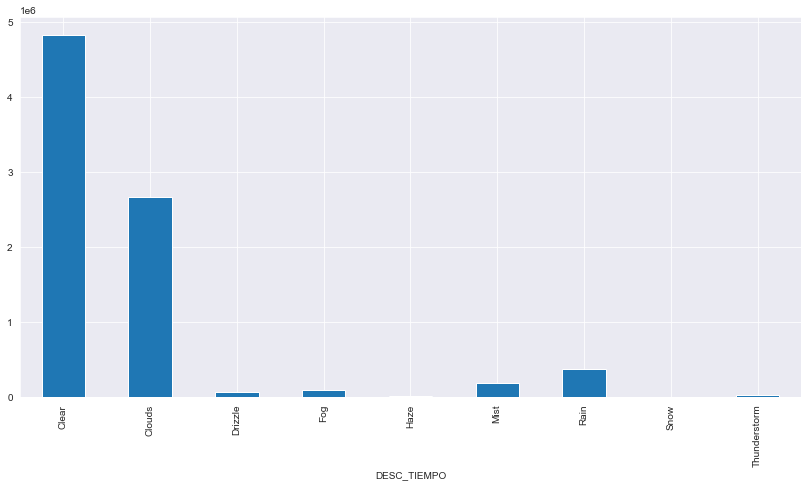

In [111]:
""" Barplot para la variable categórica """
k = data_cat.groupby(['DESC_TIEMPO']).size()
k.plot(kind='bar')
plt.show()

In [112]:
data_cat.groupby('DESC_TIEMPO').size().sort_values(ascending=False)

DESC_TIEMPO
Clear           4828636
Clouds          2659122
Rain             373892
Mist             193040
Fog               95817
Drizzle           71939
Thunderstorm      32721
Haze               9921
Snow               1393
dtype: int64

In [113]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Drizzle':'Rain'})

In [114]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Thunderstorm':'Rain'})

In [115]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Squall':'Rain'})

In [116]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Snow':'Rain'})

In [117]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Fog':'Mist'})

In [118]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Haze':'Mist'})

In [119]:
data_cat['DESC_TIEMPO'] = data_cat['DESC_TIEMPO'].replace({'Smoke':'Mist'})

In [120]:
data_cat.groupby('DESC_TIEMPO').size().sort_values(ascending=False)

DESC_TIEMPO
Clear     4828636
Clouds    2659122
Rain       479945
Mist       298778
dtype: int64

In [121]:
data_cat = pd.get_dummies(data_cat, columns=['DESC_TIEMPO'] , prefix_sep='_', drop_first = False)
data_cat

,ANIO,MES,DIA,HORA,ID_TIPO_TIEMPO,DESC_TIEMPO_detalle,DEMANDA,DESC_TIEMPO_Clear,DESC_TIEMPO_Clouds,DESC_TIEMPO_Mist,DESC_TIEMPO_Rain
0,2018,1,10,0,Otros,mist,1,0,0,1,0
1,2018,1,10,0,Otros,mist,1,0,0,1,0
2,2018,1,10,0,Otros,mist,1,0,0,1,0
3,2018,1,10,0,Otros,mist,1,0,0,1,0
4,2018,1,10,0,Otros,mist,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8266476,2020,2,9,9,Otros,mist,1,0,0,1,0
8266477,2020,2,9,9,Otros,mist,1,0,0,1,0
8266478,2020,2,9,9,Otros,mist,1,0,0,1,0
8266479,2020,2,9,9,Otros,mist,1,0,0,1,0


### c. EDA: 'DESC_TIEMPO_detalle'

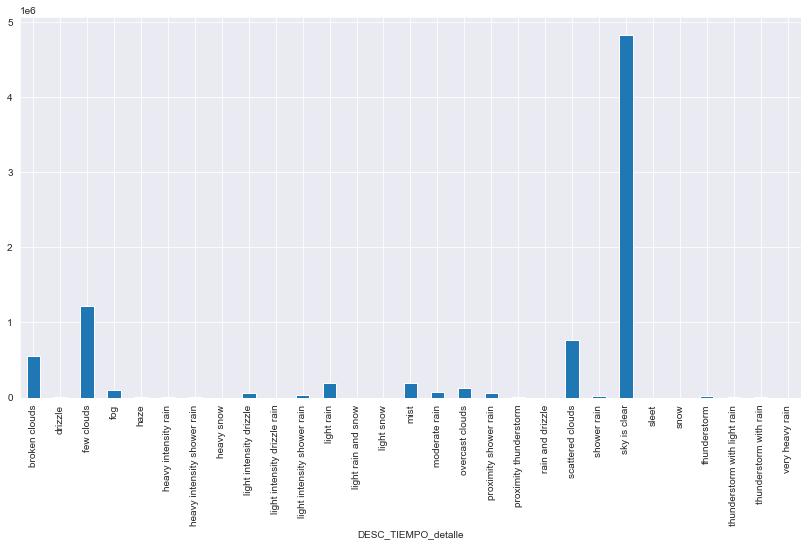

In [122]:
""" Barplot para la variable categórica """
k = data_cat.groupby(['DESC_TIEMPO_detalle']).size()
k.plot(kind='bar')
plt.show()

In [123]:
data_cat.groupby('DESC_TIEMPO_detalle').size().sort_values(ascending=False)

DESC_TIEMPO_detalle
sky is clear                    4828636
few clouds                      1216759
scattered clouds                 767427
broken clouds                    550404
light rain                       195597
mist                             193040
overcast clouds                  124532
fog                               95817
moderate rain                     67324
light intensity drizzle           61205
proximity shower rain             57097
light intensity shower rain       28540
thunderstorm                      18013
shower rain                       17663
proximity thunderstorm            11847
haze                               9921
drizzle                            9863
heavy intensity rain               5107
heavy intensity shower rain        2427
thunderstorm with light rain       1680
thunderstorm with rain             1181
light snow                          588
light intensity drizzle rain        584
snow                                386
rain and drizzle    

In [124]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'scattered clouds':'few clouds'})

In [125]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'broken clouds':'few clouds'})

In [126]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'overcast clouds':'few clouds'})

In [127]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'fog':'mist'})

In [128]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'fog':'mist'})

In [129]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'haze':'mist'})

In [130]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'smoke':'mist'})

In [131]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'light rain':'moderate rain'})

In [132]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'light intensity drizzle':'moderate rain'})

In [133]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'proximity shower rain':'moderate rain'})

In [134]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'light intensity shower rain':'moderate rain'})

In [135]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'shower rain':'moderate rain'})

In [136]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'proximity shower rain':'moderate rain'})

In [137]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'thunderstorm':'moderate rain'})

In [138]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'proximity thunderstorm':'moderate rain'})

In [139]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'drizzle':'moderate rain'})

In [140]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'heavy intensity rain':'moderate rain'})

In [141]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'very heavy rain':'moderate rain'})

In [142]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'heavy intensity shower rain':'moderate rain'})

In [143]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'thunderstorm with rain':'moderate rain'})

In [144]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'thunderstorm with light rain':'moderate rain'})

In [145]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'proximity squalls':'moderate rain'})

In [146]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'light intensity drizzle rain':'moderate rain'})

In [147]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'thunderstorm with heavy rain':'moderate rain'})

In [148]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'rain and drizzle':'moderate rain'})

In [149]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'heavy intensity drizzle':'moderate rain'})

In [150]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'light snow':'snow'})

In [151]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'light rain and snow':'snow'})

In [152]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'sleet':'snow'})

In [153]:
data_cat['DESC_TIEMPO_detalle'] = data_cat['DESC_TIEMPO_detalle'].replace({'heavy snow':'snow'})

In [154]:
data_cat.groupby('DESC_TIEMPO_detalle').size().sort_values(ascending=False)

DESC_TIEMPO_detalle
sky is clear     4828636
few clouds       2659122
moderate rain     478552
mist              298778
snow                1393
dtype: int64

In [155]:
data_cat = pd.get_dummies(data_cat, columns=['DESC_TIEMPO_detalle'] , prefix_sep='_', drop_first = False)
data_cat

,ANIO,MES,DIA,HORA,ID_TIPO_TIEMPO,DEMANDA,DESC_TIEMPO_Clear,DESC_TIEMPO_Clouds,DESC_TIEMPO_Mist,DESC_TIEMPO_Rain,DESC_TIEMPO_detalle_few clouds,DESC_TIEMPO_detalle_mist,DESC_TIEMPO_detalle_moderate rain,DESC_TIEMPO_detalle_sky is clear,DESC_TIEMPO_detalle_snow
0,2018,1,10,0,Otros,1,0,0,1,0,0,1,0,0,0
1,2018,1,10,0,Otros,1,0,0,1,0,0,1,0,0,0
2,2018,1,10,0,Otros,1,0,0,1,0,0,1,0,0,0
3,2018,1,10,0,Otros,1,0,0,1,0,0,1,0,0,0
4,2018,1,10,0,Otros,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266476,2020,2,9,9,Otros,1,0,0,1,0,0,1,0,0,0
8266477,2020,2,9,9,Otros,1,0,0,1,0,0,1,0,0,0
8266478,2020,2,9,9,Otros,1,0,0,1,0,0,1,0,0,0
8266479,2020,2,9,9,Otros,1,0,0,1,0,0,1,0,0,0


In [156]:
############################
### Datos sin agregación ###
############################

data_serie = data_cat[['ANIO','MES','DIA','HORA','DESC_TIEMPO_Clear', 'DESC_TIEMPO_Clouds','DESC_TIEMPO_Mist',
                         'DESC_TIEMPO_Rain', 'DESC_TIEMPO_detalle_few clouds', 'DESC_TIEMPO_detalle_mist',
                         'DESC_TIEMPO_detalle_moderate rain', 'DESC_TIEMPO_detalle_sky is clear', 'DESC_TIEMPO_detalle_snow',
                         'DEMANDA']]
data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],
                                          'month': data_serie["MES"]
                                          ,'day':  data_serie['DIA']
                                         # ,'hour':data_serie['HORA']
                                          },
                                          format='%d-%m-%Y', errors='coerce')
data_serie

,ANIO,MES,DIA,HORA,DESC_TIEMPO_Clear,DESC_TIEMPO_Clouds,DESC_TIEMPO_Mist,DESC_TIEMPO_Rain,DESC_TIEMPO_detalle_few clouds,DESC_TIEMPO_detalle_mist,DESC_TIEMPO_detalle_moderate rain,DESC_TIEMPO_detalle_sky is clear,DESC_TIEMPO_detalle_snow,DEMANDA,FECHA
0,2018,1,10,0,0,0,1,0,0,1,0,0,0,1,2018-01-10
1,2018,1,10,0,0,0,1,0,0,1,0,0,0,1,2018-01-10
2,2018,1,10,0,0,0,1,0,0,1,0,0,0,1,2018-01-10
3,2018,1,10,0,0,0,1,0,0,1,0,0,0,1,2018-01-10
4,2018,1,10,0,0,0,1,0,0,1,0,0,0,1,2018-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266476,2020,2,9,9,0,0,1,0,0,1,0,0,0,1,2020-02-09
8266477,2020,2,9,9,0,0,1,0,0,1,0,0,0,1,2020-02-09
8266478,2020,2,9,9,0,0,1,0,0,1,0,0,0,1,2020-02-09
8266479,2020,2,9,9,0,0,1,0,0,1,0,0,0,1,2020-02-09


In [157]:
###############################
### Datos agregados por día ###
###############################

data_cat_dia = data_serie.groupby(['FECHA']).agg(DESC_TIEMPO_Clear=('DESC_TIEMPO_Clear','sum'), 
                                                 DESC_TIEMPO_Clouds=('DESC_TIEMPO_Clouds','sum'),
                                                 DESC_TIEMPO_Mist=('DESC_TIEMPO_Mist','sum'),
                                                 DESC_TIEMPO_Rain=('DESC_TIEMPO_Rain','sum'),
                                                 DESC_TIEMPO_detalle_few_clouds=('DESC_TIEMPO_detalle_few clouds','sum'),
                                                 DESC_TIEMPO_detalle_mist=('DESC_TIEMPO_detalle_mist','sum'),
                                                 DESC_TIEMPO_detalle_moderate_rain=('DESC_TIEMPO_detalle_moderate rain','sum'),
                                                 DESC_TIEMPO_detalle_sky_is_clear=('DESC_TIEMPO_detalle_sky is clear','sum'),
                                                 DESC_TIEMPO_detalle_snow=('DESC_TIEMPO_detalle_snow','sum'),
                                                 DEMANDA=('DEMANDA','sum'))   
data_cat_dia = data_cat_dia.reset_index()
data_cat_dia

,FECHA,DESC_TIEMPO_Clear,DESC_TIEMPO_Clouds,DESC_TIEMPO_Mist,DESC_TIEMPO_Rain,DESC_TIEMPO_detalle_few_clouds,DESC_TIEMPO_detalle_mist,DESC_TIEMPO_detalle_moderate_rain,DESC_TIEMPO_detalle_sky_is_clear,DESC_TIEMPO_detalle_snow,DEMANDA
0,2018-01-01,"2,558.0","1,679.0",0.0,0.0,"1,679.0",0.0,0.0,"2,558.0",0.0,4399
1,2018-01-02,"1,040.0","6,462.0",0.0,0.0,"6,462.0",0.0,0.0,"1,040.0",0.0,7767
2,2018-01-03,264.0,"5,260.0","3,286.0",0.0,"5,260.0","3,286.0",0.0,264.0,0.0,9040
3,2018-01-04,"2,762.0","4,282.0","2,305.0",0.0,"4,282.0","2,305.0",0.0,"2,762.0",0.0,9541
4,2018-01-05,0.0,"4,674.0",0.0,"1,820.0","4,674.0",0.0,"1,820.0",0.0,0.0,6676
...,...,...,...,...,...,...,...,...,...,...,...
770,2020-02-25,"6,451.0","7,154.0",0.0,0.0,"7,154.0",0.0,0.0,"6,451.0",0.0,13648
771,2020-02-26,"10,508.0","3,628.0",0.0,0.0,"3,628.0",0.0,0.0,"10,508.0",0.0,14223
772,2020-02-27,"9,394.0",44.0,"4,910.0",0.0,44.0,"4,910.0",0.0,"9,394.0",0.0,14480
773,2020-02-28,"13,564.0",0.0,0.0,0.0,0.0,0.0,0.0,"13,564.0",0.0,13630


### Correlograma de las variables meteorológicas versus la variable demanda

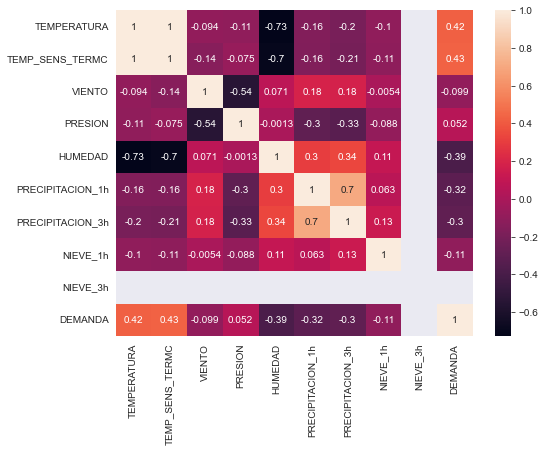

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = data_serie_temp.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()